In [1]:
!pip install netCDF4



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 51.9 MB/s eta 0:00:00


In [2]:
import pathlib

base_dir = pathlib.Path(
    '/content/drive/MyDrive/Flood_Thesis/Data/ERA5_Data/Coarse_ERA5'
)
nc_files = sorted(base_dir.glob('*.nc'))

print(f"Found {len(nc_files)} NetCDF files:")
for fn in nc_files:
    print(" ", fn.name)



Found 6 NetCDF files:
  sp_ERA5_2017_2019.nc
  swvl1_ERA5_2017_2019.nc
  t2m_ERA5_2017_2019.nc
  tp_ERA5_2017_2019.nc
  u10_ERA5_2017_2019.nc
  v10_ERA5_2017_2019.nc


In [3]:
NC_ENGINE = 'h5netcdf'

In [5]:
import xarray as xr

sample = nc_files[0]
print(f"\nInspecting {sample.name}:\n")

ds = xr.open_dataset(sample, engine=NC_ENGINE)
print(ds)                     # Full summary
print("\nDimensions:", ds.dims)
print("Coordinates:", list(ds.coords))
print("Data variables:", list(ds.data_vars))

# Use `valid_time` instead of `time`:
print("Time range:",
      ds.valid_time.min().values,
      "→",
      ds.valid_time.max().values)

ds.close()




Inspecting sp_ERA5_2017_2019.nc:

<xarray.Dataset> Size: 44kB
Dimensions:     (valid_time: 1095, latitude: 2, longitude: 2)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 9kB 2017-01-01T12:00:00 ... 2019-...
  * latitude    (latitude) float64 16B 27.65 27.4
  * longitude   (longitude) float64 16B 85.15 85.4
    expver      (valid_time) <U4 18kB ...
Data variables:
    sp          (valid_time, latitude, longitude) float32 18kB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-05-13T03:34 GRIB to CDM+CF via cfgrib-0.9.1...

Dimensions: FrozenMappingWarningOnValuesAccess({'valid_time': 1095, 'latitude': 2, 'longitude': 2})
Coordinates: ['number', 'valid_time', 'latitude', 'longitude', 'expver'

In [6]:
#Loop through ALL files & print spatial/time metadata + missingness
for f in nc_files:
    print(f"\n=== File: {f.name} ===")
    ds = xr.open_dataset(f, engine=NC_ENGINE)

    # 4a. Spatial resolution & extent
    lat = ds.latitude.values
    lon = ds.longitude.values
    print(f"Latitude:  {lat.min():.2f} → {lat.max():.2f}"
          f"  (Δ={abs(lat[1]-lat[0]):.3f}°, n={lat.size})")
    print(f"Longitude: {lon.min():.2f} → {lon.max():.2f}"
          f"  (Δ={abs(lon[1]-lon[0]):.3f}°, n={lon.size})")

    # 4b. Time coverage
    t0 = ds.valid_time.min().values
    t1 = ds.valid_time.max().values
    print(f"valid_time: {t0} → {t1}  (n={ds.sizes['valid_time']})")

    # 4c. Missing‐value check at first timestep
    varname = list(ds.data_vars)[0]                     # pick the single variable, e.g. "sp"
    da0 = ds[varname].isnull().isel(valid_time=0)       # DataArray of booleans
    missing_count = int(da0.sum(dim=['latitude','longitude']).values)
    total_cells   = lat.size * lon.size
    pct_missing   = missing_count / total_cells * 100
    print(f"% missing @ first timestep: {pct_missing:.2f}%")

    ds.close()


=== File: sp_ERA5_2017_2019.nc ===
Latitude:  27.40 → 27.65  (Δ=0.250°, n=2)
Longitude: 85.15 → 85.40  (Δ=0.250°, n=2)
valid_time: 2017-01-01T12:00:00.000000000 → 2019-12-31T12:00:00.000000000  (n=1095)
% missing @ first timestep: 0.00%

=== File: swvl1_ERA5_2017_2019.nc ===
Latitude:  27.40 → 27.65  (Δ=0.250°, n=2)
Longitude: 85.15 → 85.40  (Δ=0.250°, n=2)
valid_time: 2017-01-01T12:00:00.000000000 → 2019-12-31T12:00:00.000000000  (n=1095)
% missing @ first timestep: 0.00%

=== File: t2m_ERA5_2017_2019.nc ===
Latitude:  27.40 → 27.65  (Δ=0.250°, n=2)
Longitude: 85.15 → 85.40  (Δ=0.250°, n=2)
valid_time: 2017-01-01T12:00:00.000000000 → 2019-12-31T12:00:00.000000000  (n=1095)
% missing @ first timestep: 0.00%

=== File: tp_ERA5_2017_2019.nc ===
Latitude:  27.40 → 27.65  (Δ=0.250°, n=2)
Longitude: 85.15 → 85.40  (Δ=0.250°, n=2)
valid_time: 2017-01-01T12:00:00.000000000 → 2019-12-31T12:00:00.000000000  (n=1095)
% missing @ first timestep: 0.00%

=== File: u10_ERA5_2017_2019.nc ===
Latitud

In [ ]:
from pathlib import Path
era5_dir = Path('/content/drive/MyDrive/Flood_Thesis/Data/ERA5_Data/Coarse_ERA5')

print("Files in ERA5 folder:")
for f in era5_dir.iterdir():
    print(" -", f.name)


Files in ERA5 folder:
 - sp_ERA5_2017_2019.nc
 - v10_ERA5_2017_2019.nc
 - u10_ERA5_2017_2019.nc
 - swvl1_ERA5_2017_2019.nc
 - t2m_ERA5_2017_2019.nc
 - tp_ERA5_2017_2019.nc


ERA5 files:
   sp_ERA5_2017_2019.nc
   v10_ERA5_2017_2019.nc
   u10_ERA5_2017_2019.nc
   swvl1_ERA5_2017_2019.nc
   t2m_ERA5_2017_2019.nc
   tp_ERA5_2017_2019.nc
<xarray.Dataset> Size: 44kB
Dimensions:     (valid_time: 1095, latitude: 2, longitude: 2)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 9kB 2017-01-01T12:00:00 ... 2019-...
  * latitude    (latitude) float64 16B 27.65 27.4
  * longitude   (longitude) float64 16B 85.15 85.4
    expver      (valid_time) <U4 18kB ...
Data variables:
    tp          (valid_time, latitude, longitude) float32 18kB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-05-13T03:19 GRIB to CDM+CF via cfgrib-0.9.1...
Time range: 2017-01-01T12:00:00.000000000 → 2

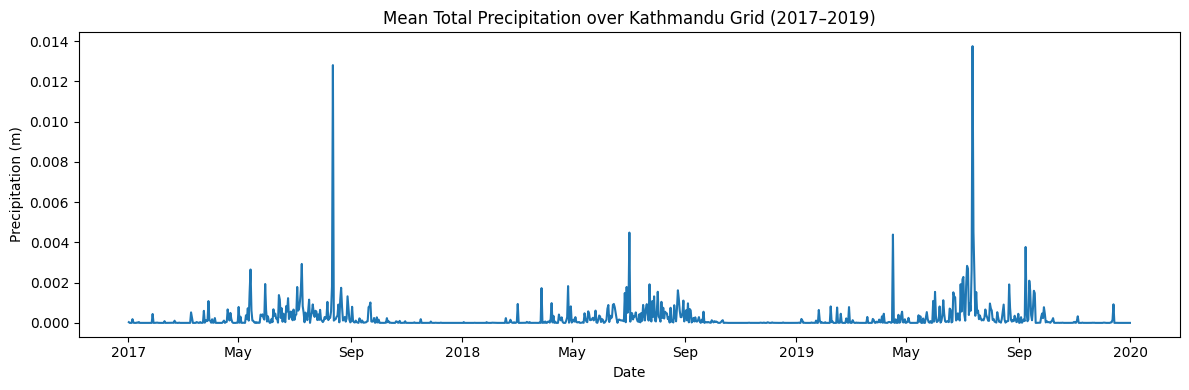

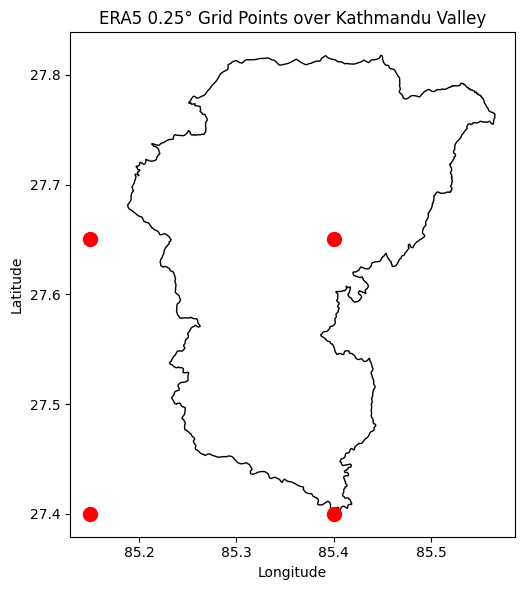

In [7]:
# === Flood Prediction: ERA5 Precipitation TS & Kathmandu Boundary Overlay ===

import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# 1️⃣ Configure file paths and xarray engine
NC_ENGINE = 'h5netcdf'  # or 'netcdf4' if you pip-install netCDF4
era5_dir = Path('/content/drive/MyDrive/Flood_Thesis/Data/ERA5_Data/Coarse_ERA5')
tp_file   = era5_dir / 'tp_ERA5_2017_2019.nc'
shp_file  = Path('/content/drive/MyDrive/Flood_Thesis/Data/kathmandu valley border/kathmandu valley border.shp')

# (Optional) – print out all .nc in your ERA5 folder to confirm
print("ERA5 files:")
for f in era5_dir.glob('*.nc'):
    print("  ", f.name)

# 2️⃣ Load the total_precipitation dataset
ds_tp = xr.open_dataset(tp_file, engine=NC_ENGINE)

# 3️⃣ Inspect the dataset structure
print(ds_tp)                           # dims, coords, data_vars, attrs
print("Time range:",
      ds_tp.valid_time.min().values,
      "→",
      ds_tp.valid_time.max().values)

# 4️⃣ Compute the mean time series over the 2×2 grid
ts_tp = ds_tp['tp'].mean(dim=['latitude', 'longitude'])

# 5️⃣ Plot the precipitation time series
plt.figure(figsize=(12, 4))
ts_tp.plot.line()
plt.title("Mean Total Precipitation over Kathmandu Grid (2017–2019)")
plt.xlabel("Date")
plt.ylabel("Precipitation (m)")
plt.tight_layout()
plt.show()

# 6️⃣ Load the Kathmandu Valley shapefile and reproject to EPSG:4326
gdf = gpd.read_file(shp_file).to_crs(epsg=4326)

# 7️⃣ Create GeoDataFrame for ERA5 grid points
lats = ds_tp.latitude.values
lons = ds_tp.longitude.values
lon2d, lat2d = np.meshgrid(lons, lats)
points = gpd.GeoDataFrame(
    geometry=gpd.points_from_xy(lon2d.flatten(), lat2d.flatten()),
    crs='EPSG:4326'
)

# 8️⃣ Plot the valley boundary with ERA5 grid overlay
fig, ax = plt.subplots(figsize=(6, 6))
gdf.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1)
points.plot(ax=ax, color='red', marker='o', markersize=100)
ax.set_title("ERA5 0.25° Grid Points over Kathmandu Valley")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.tight_layout()
plt.show()


In [ ]:
print("Grid centers (lat, lon):")
for lat in ds_tp.latitude.values:
    for lon in ds_tp.longitude.values:
        print(f"  ({lat:.2f}, {lon:.2f})")


Grid centers (lat, lon):
  (27.65, 85.15)
  (27.65, 85.40)
  (27.40, 85.15)
  (27.40, 85.40)


In [ ]:
lat_min, lat_max = float(ds_tp.latitude.min()), float(ds_tp.latitude.max())
lon_min, lon_max = float(ds_tp.longitude.min()), float(ds_tp.longitude.max())
print(f"Grid spans lat {lat_min:.2f} → {lat_max:.2f}")
print(f"Grid spans lon {lon_min:.2f} → {lon_max:.2f}")


Grid spans lat 27.40 → 27.65
Grid spans lon 85.15 → 85.40


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


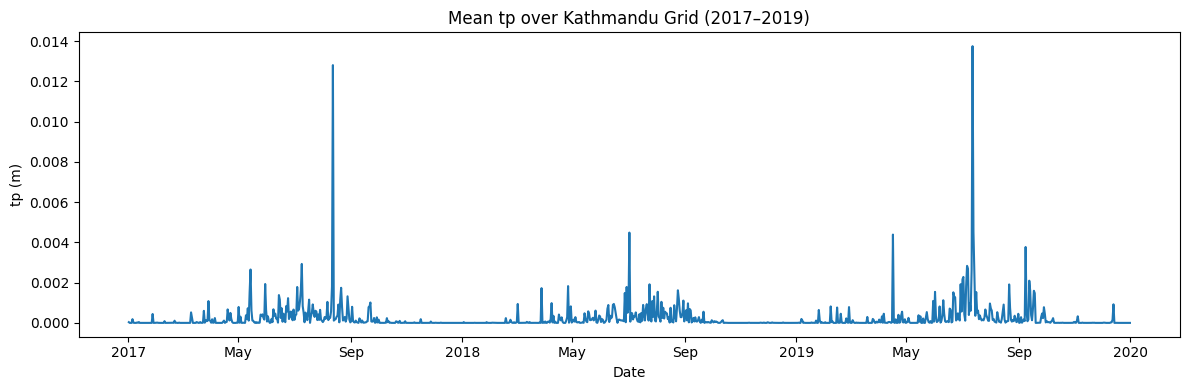

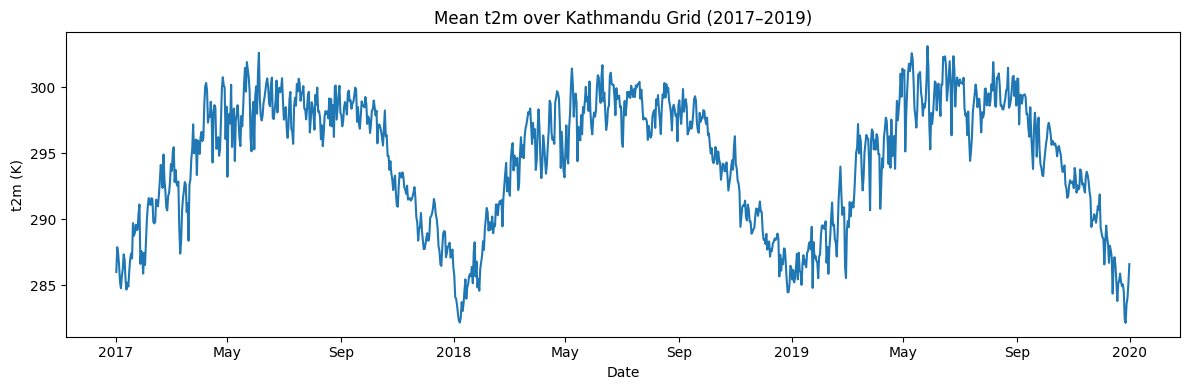

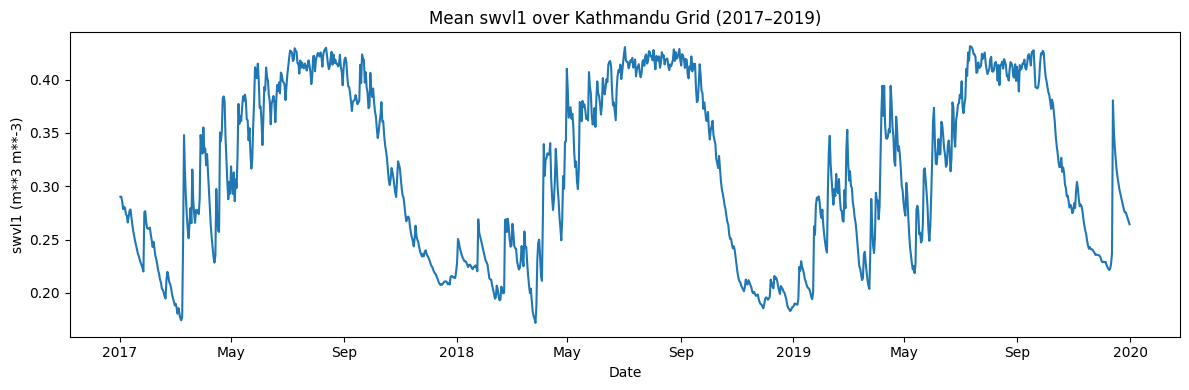

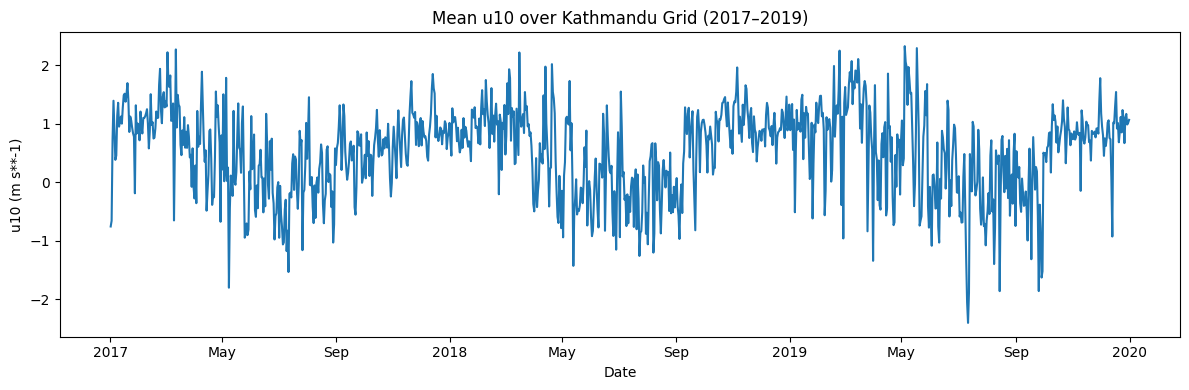

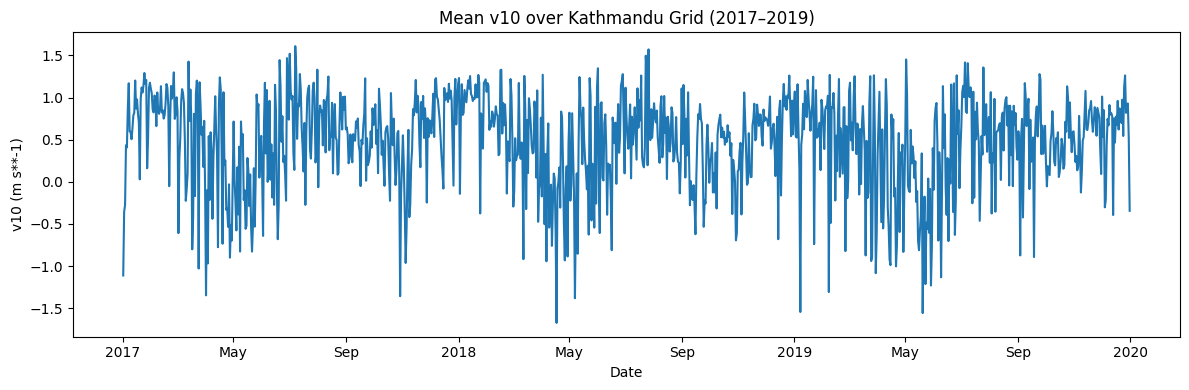

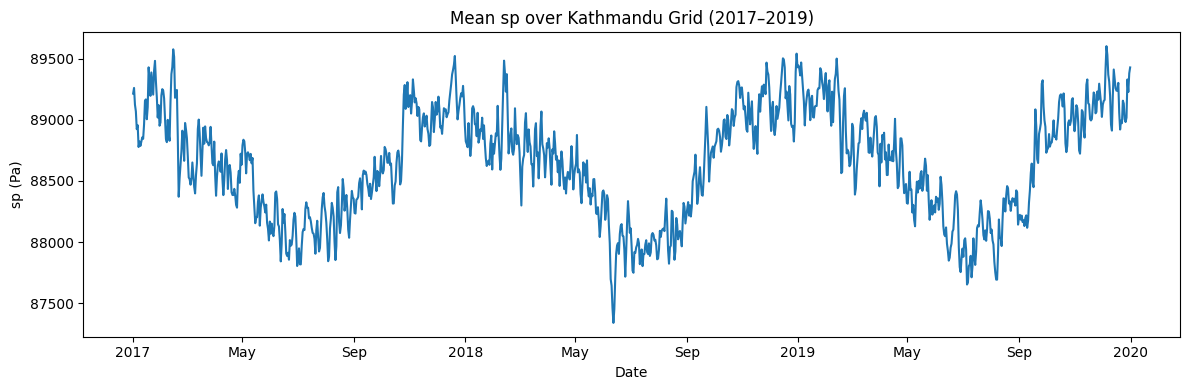

In [ ]:
# === 1. Mount Google Drive ===
from google.colab import drive
drive.mount('/content/drive')

import xarray as xr
import matplotlib.pyplot as plt
from pathlib import Path

# === 2. Configuration ===
NC_ENGINE = 'h5netcdf'  # or 'netcdf4' if you pip-installed netCDF4
base_dir = Path('/content/drive/MyDrive/Flood_Thesis/Data/ERA5_Data/Coarse_ERA5')

# Map each short name → its .nc file
files = {
    'tp':    'tp_ERA5_2017_2019.nc',    # total_precipitation (m)
    't2m':   't2m_ERA5_2017_2019.nc',   # 2m_temperature (K)
    'swvl1': 'swvl1_ERA5_2017_2019.nc', # volumetric_soil_water_layer_1 (m³/m³)
    'u10':   'u10_ERA5_2017_2019.nc',   # 10m_u_component_of_wind (m/s)
    'v10':   'v10_ERA5_2017_2019.nc',   # 10m_v_component_of_wind (m/s)
    'sp':    'sp_ERA5_2017_2019.nc'     # surface_pressure (Pa)
}

# === 3. Loop, compute mean TS, and plot ===
for var, fname in files.items():
    path = base_dir / fname
    if not path.exists():
        print(f"❌ File not found: {path}")
        continue

    # Load dataset
    ds = xr.open_dataset(path, engine=NC_ENGINE)

    # Compute mean over the 2×2 grid
    da = ds[var].mean(dim=['latitude', 'longitude'])

    # Plot
    plt.figure(figsize=(12, 4))
    da.plot.line()
    unit = ds[var].attrs.get('units', '')
    plt.title(f"Mean {var} over Kathmandu Grid (2017–2019)")
    plt.xlabel("Date")
    plt.ylabel(f"{var} ({unit})")
    plt.tight_layout()
    plt.show()

    ds.close()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


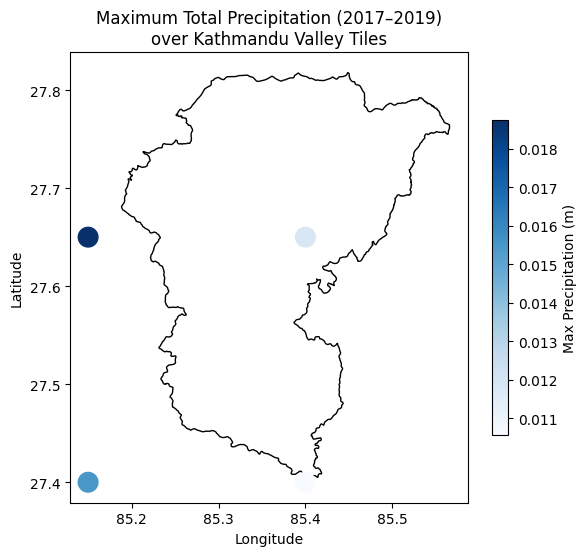

In [ ]:
# 1. Mount Drive (only in Colab)
from google.colab import drive
drive.mount('/content/drive')

import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path

# 2. Paths & engine
NC_ENGINE = 'h5netcdf'  # or 'netcdf4' if installed
era5_dir = Path('/content/drive/MyDrive/Flood_Thesis/Data/ERA5_Data/Coarse_ERA5')
tp_file   = era5_dir / 'tp_ERA5_2017_2019.nc'
shp_file  = Path('/content/drive/MyDrive/Flood_Thesis/Data/kathmandu valley border/kathmandu valley border.shp')

# 3. Load precip and compute max
ds = xr.open_dataset(tp_file, engine=NC_ENGINE)
max_tp = ds['tp'].max(dim='valid_time')  # DataArray (lat × lon)
ds.close()

# 4. Build a GeoDataFrame of the four grid‐cell centers
lats = max_tp.latitude.values
lons = max_tp.longitude.values
lon2d, lat2d = np.meshgrid(lons, lats)
vals = max_tp.values

df = pd.DataFrame({
    'lon': lon2d.flatten(),
    'lat': lat2d.flatten(),
    'max_tp': vals.flatten()
})
points = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat), crs='EPSG:4326')

# 5. Load & reproject Kathmandu boundary
gdf = gpd.read_file(shp_file).to_crs(epsg=4326)

# 6. Plot
fig, ax = plt.subplots(figsize=(6,6))
gdf.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1)
points.plot(
    ax=ax,
    column='max_tp',
    cmap='Blues',
    markersize=200,
    legend=True,
    legend_kwds={'label': "Max Precipitation (m)", 'shrink': 0.6}
)
ax.set_title("Maximum Total Precipitation (2017–2019)\nover Kathmandu Valley Tiles")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.tight_layout()
plt.show()


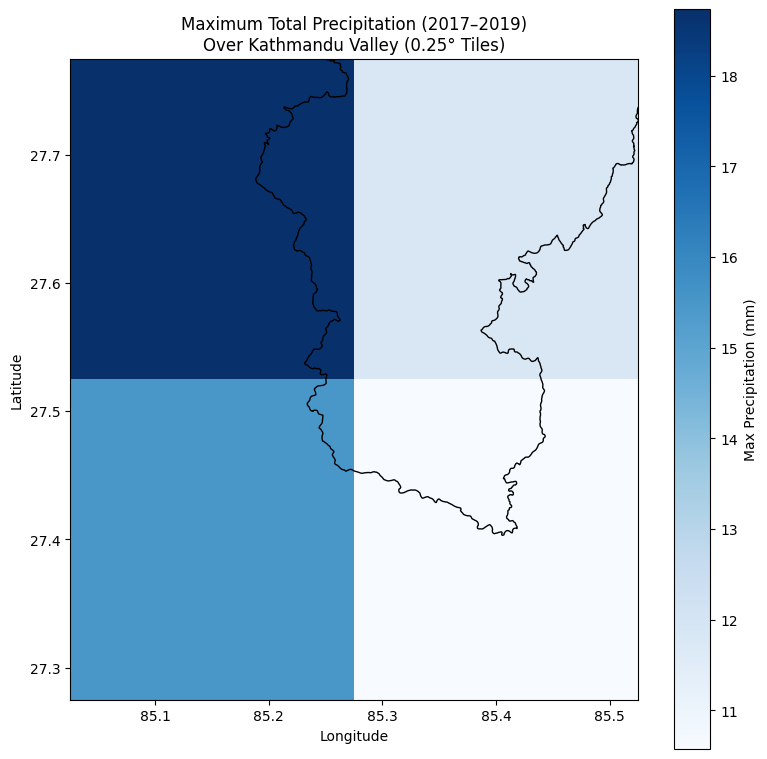

In [ ]:


import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# 2️⃣ File paths & engine
NC_ENGINE = 'h5netcdf'    # or 'h5netcdf' if you prefer
era5_dir = Path('/content/drive/MyDrive/Flood_Thesis/Data/ERA5_Data/Coarse_ERA5')
tp_path   = era5_dir / 'tp_ERA5_2017_2019.nc'
shp_path  = Path('/content/drive/MyDrive/Flood_Thesis/Data/kathmandu valley border/kathmandu valley border.shp')

# 3️⃣ Load precipitation, compute max, convert to mm
ds = xr.open_dataset(tp_path, engine=NC_ENGINE)
max_tp = ds['tp'].max(dim='valid_time') * 1000  # from meters → millimeters
ds.close()

# 4️⃣ Load valley boundary in WGS84
gdf = gpd.read_file(shp_path).to_crs(epsg=4326)

# 5️⃣ Plot using pcolormesh
fig, ax = plt.subplots(figsize=(8, 8))
# Shade each 0.25° tile by its max value
max_tp.plot.pcolormesh(
    ax=ax,
    x='longitude',
    y='latitude',
    cmap='Blues',
    shading='auto',
    cbar_kwargs={'label': 'Max Precipitation (mm)'}
)
# Overlay the boundary
gdf.boundary.plot(ax=ax, edgecolor='black', linewidth=1)

ax.set_title("Maximum Total Precipitation (2017–2019)\nOver Kathmandu Valley (0.25° Tiles)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.tight_layout()
plt.show()


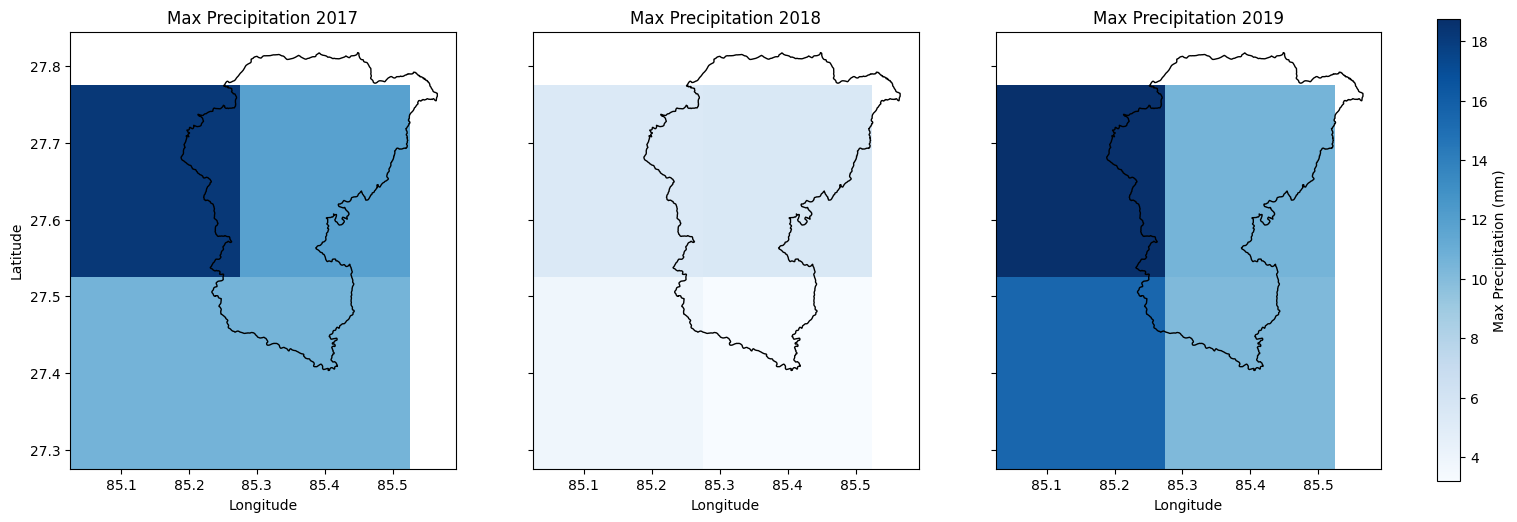

In [ ]:
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# 1️⃣ Configuration: paths & engine
NC_ENGINE = 'h5netcdf'  # or 'netcdf4' if you pip-installed netCDF4
era5_dir = Path('/content/drive/MyDrive/Flood_Thesis/Data/ERA5_Data/Coarse_ERA5')
tp_file   = era5_dir / 'tp_ERA5_2017_2019.nc'
shp_file  = Path('/content/drive/MyDrive/Flood_Thesis/Data/kathmandu valley border/kathmandu valley border.shp')

# 2️⃣ Load ERA5 precipitation, convert to mm
ds = xr.open_dataset(tp_file, engine=NC_ENGINE)
tp_mm = ds['tp'] * 1000  # from meters → mm

# 3️⃣ Group by calendar year and take the max over each year
tp_year_max = tp_mm.groupby('valid_time.year').max(dim='valid_time')
ds.close()

# 4️⃣ Determine a common color scale across all years
vmin = float(tp_year_max.min())
vmax = float(tp_year_max.max())

# 5️⃣ Load and reproject Kathmandu Valley boundary to EPSG:4326
gdf = gpd.read_file(shp_file).to_crs(epsg=4326)

# 6️⃣ Plotting a 1×3 figure
years = [2017, 2018, 2019]
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for ax, year in zip(axes, years):
    data = tp_year_max.sel(year=year)
    mesh = ax.pcolormesh(
        data.longitude, data.latitude, data.values,
        cmap='Blues', vmin=vmin, vmax=vmax, shading='auto'
    )
    gdf.boundary.plot(ax=ax, edgecolor='black', linewidth=1)
    ax.set_title(f"Max Precipitation {year}")
    ax.set_xlabel("Longitude")

axes[0].set_ylabel("Latitude")
cbar = fig.colorbar(mesh, ax=axes.ravel().tolist(),
                    orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label("Max Precipitation (mm)")

plt.show()


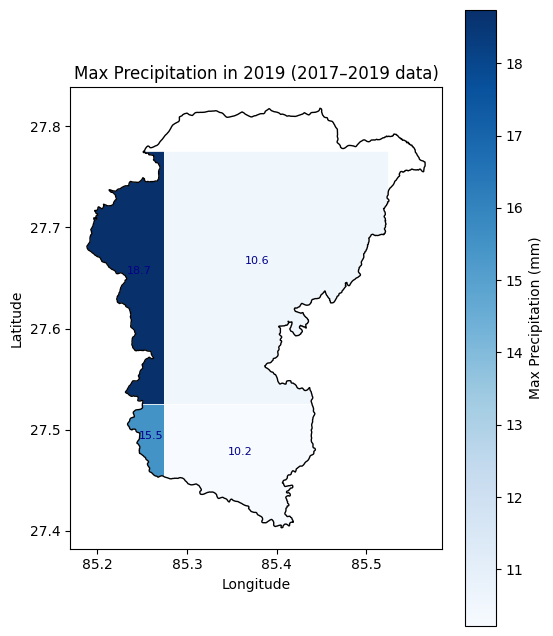

In [ ]:
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import box
from pathlib import Path

# 1️⃣ Paths & engine
NC_ENGINE = 'h5netcdf'
era5_dir = Path('/content/drive/MyDrive/Flood_Thesis/Data/ERA5_Data/Coarse_ERA5')
tp_file   = era5_dir / 'tp_ERA5_2017_2019.nc'
shp_file  = Path('/content/drive/MyDrive/Flood_Thesis/Data/kathmandu valley border/kathmandu valley border.shp')

# 2️⃣ Load precipitation & compute yearly max (in mm)
ds = xr.open_dataset(tp_file, engine=NC_ENGINE)
tp_mm = (ds['tp'] * 1000)  # meters → mm
# pick one year:
year = 2019
tp_max = tp_mm.groupby('valid_time.year').max(dim='valid_time').sel(year=year)
ds.close()

# 3️⃣ Load & prepare the valley boundary
valley = gpd.read_file(shp_file).to_crs(epsg=4326)

# 4️⃣ Build square polygons around each 0.25° tile center
half = 0.125  # half of 0.25°
geoms = []
values = []
for lat in tp_max.latitude.values:
    for lon in tp_max.longitude.values:
        # create a square [lon-half, lat-half]→[lon+half, lat+half]
        sq = box(lon-half, lat-half, lon+half, lat+half)
        geoms.append(sq)
        values.append(float(tp_max.sel(latitude=lat, longitude=lon)))

tiles = gpd.GeoDataFrame({'max_tp_mm': values}, geometry=geoms, crs='EPSG:4326')

# 5️⃣ Clip to the valley outline
tiles_clipped = gpd.overlay(tiles, valley, how='intersection')

# 6️⃣ Plot
fig, ax = plt.subplots(1, 1, figsize=(6, 8))
# color the clipped tiles
tiles_clipped.plot(
    ax=ax,
    column='max_tp_mm',
    cmap='Blues',
    edgecolor='white',
    linewidth=0.5,
    legend=True,
    legend_kwds={'label': "Max Precipitation (mm)"}
)
# outline the valley
valley.boundary.plot(ax=ax, color='black', linewidth=1)

# label each tile with its value
for idx, row in tiles_clipped.iterrows():
    x, y = row.geometry.centroid.x, row.geometry.centroid.y
    ax.text(x, y, f"{row.max_tp_mm:.1f}", ha='center', va='center', fontsize=8, color='darkblue')

ax.set_title(f"Max Precipitation in {year} (2017–2019 data)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()


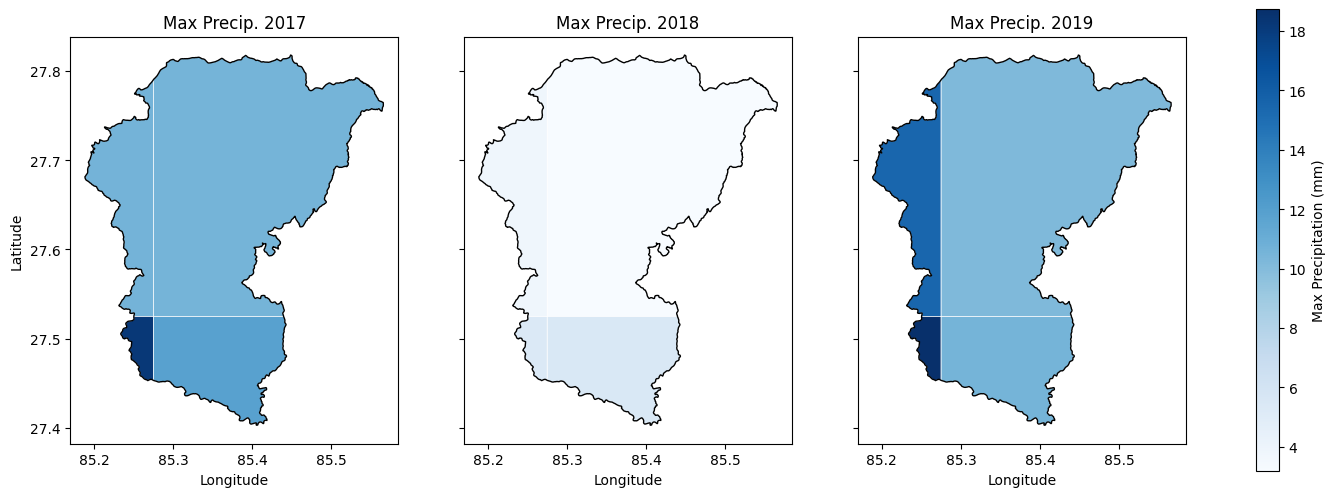

In [9]:
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import box
from pathlib import Path

# 1️⃣ Paths & engine
NC_ENGINE = 'h5netcdf'
era5_dir = Path('/content/drive/MyDrive/Flood_Thesis/Data/ERA5_Data/Coarse_ERA5')
tp_file   = era5_dir / 'tp_ERA5_2017_2019.nc'
shp_file  = Path('/content/drive/MyDrive/Flood_Thesis/Data/kathmandu valley border/kathmandu valley border.shp')

# 2️⃣ Load & preprocess
ds = xr.open_dataset(tp_file, engine=NC_ENGINE)
tp_mm = ds['tp'] * 1000  # m → mm
# max per calendar year
tp_year_max = tp_mm.groupby('valid_time.year').max(dim='valid_time')
ds.close()

# 3️⃣ Load valley boundary
valley = gpd.read_file(shp_file).to_crs(epsg=4326)
minx, miny, maxx, maxy = valley.total_bounds

# 4️⃣ Compute grid mid‐lines
lons = tp_year_max.longitude.values   # e.g. [85.15, 85.40]
lats = tp_year_max.latitude.values     # e.g. [27.40, 27.65]
mid_x = lons.mean()
mid_y = lats.mean()

# 5️⃣ Build full‐extent quadrant polygons
quadrants = {
    'NW': box(minx, mid_y, mid_x, maxy),
    'NE': box(mid_x, mid_y, maxx, maxy),
    'SW': box(minx, miny, mid_x, mid_y),
    'SE': box(mid_x, miny, maxx, mid_y),
}

# 6️⃣ Prepare for plotting
years = [2017, 2018, 2019]
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# determine shared color scale
vmin = float(tp_year_max.min())
vmax = float(tp_year_max.max())

for ax, year in zip(axes, years):
    # select the max‐tp array for this year
    arr = tp_year_max.sel(year=year)

    # build a GeoDataFrame of quadrants with this year’s values
    rows = []
    for quad, poly in quadrants.items():
        # pick tile‐center lat/lon by quadrant
        lon = lons[0] if quad in ('NW','SW') else lons[1]
        lat = lats[1] if quad in ('NW','NE') else lats[0]
        val = float(arr.sel(latitude=lat, longitude=lon).values)
        rows.append({'max_tp_mm': val, 'geometry': poly})

    gdf_quads = gpd.GeoDataFrame(rows, crs='EPSG:4326')
    # clip to valley outline
    clipped = gpd.overlay(gdf_quads, valley, how='intersection')

    # plot filled quadrants
    clipped.plot(
        ax=ax,
        column='max_tp_mm',
        cmap='Blues',
        vmin=vmin,
        vmax=vmax,
        edgecolor='white',
        linewidth=0.5,
        legend=False
    )
    # outline valley
    valley.boundary.plot(ax=ax, edgecolor='black', linewidth=1)
    ax.set_title(f"Max Precip. {year}")
    ax.set_xlabel("Longitude")

axes[0].set_ylabel("Latitude")

# shared colorbar
sm = plt.cm.ScalarMappable(
    cmap='Blues',
    norm=plt.Normalize(vmin=vmin, vmax=vmax)
)
sm._A = []
fig.colorbar(sm, ax=axes.ravel().tolist(), label="Max Precipitation (mm)")

plt.show()


=== Weekly Summary (0.25°) ===
        weekly_tp  weekly_t2m
count  158.000000  158.000000
mean     0.001593   21.286769
std      0.002910    4.729827
min      0.000000   10.338617
25%      0.000037   17.184564
50%      0.000506   22.700525
75%      0.001988   25.244638
max      0.025433   28.426599


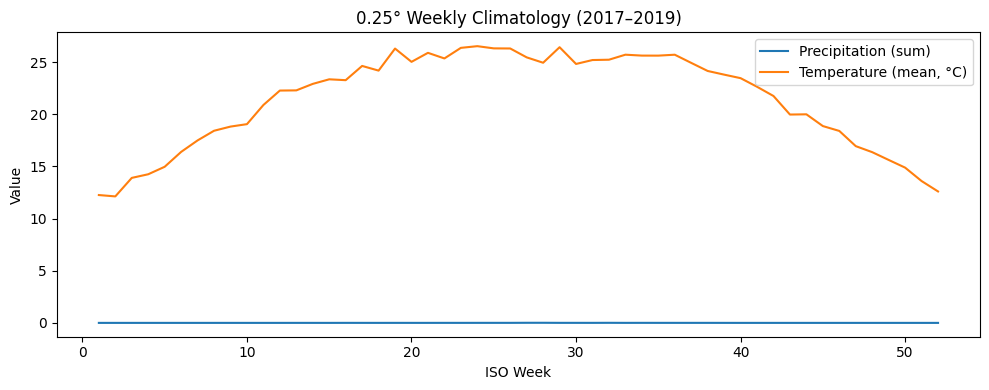

In [2]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# --- 1) Load

TP_PATH  = '/content/drive/MyDrive/Flood_Thesis/Data/ERA5_Data/Coarse_ERA5/tp_ERA5_2017_2019.nc'
T2M_PATH = '/content/drive/MyDrive/Flood_Thesis/Data/ERA5_Data/Coarse_ERA5/t2m_ERA5_2017_2019.nc'

ds_tp  = xr.open_dataset(TP_PATH,  engine='h5netcdf').rename({'valid_time':'time'})
ds_t2m = xr.open_dataset(T2M_PATH, engine='h5netcdf').rename({'valid_time':'time'})

# --- 2) Spatial mean over the 2×2 grid ---
tp0  = ds_tp['tp'].mean(dim=['latitude','longitude'])
t2m0 = ds_t2m['t2m'].mean(dim=['latitude','longitude'])

# --- 3) Weekly aggregation ---
# sum precipitation, mean temperature
tp_wk  = tp0.resample(time='W').sum()
t2m_wk = t2m0.resample(time='W').mean()

# --- 4) Build a pandas DataFrame ---
df = pd.DataFrame({
    'time': tp_wk.time.values,
    'weekly_tp': tp_wk.values,
    'weekly_t2m': t2m_wk.values - 273.15    # convert from K to °C
})
df['year'] = df['time'].dt.year
df['week'] = df['time'].dt.isocalendar().week

# --- 5) Summary statistics ---
print("=== Weekly Summary (0.25°) ===")
print(df[['weekly_tp','weekly_t2m']].describe())

# --- 6) Weekly climatology ---
clim = df.groupby('week')[['weekly_tp','weekly_t2m']].mean().reset_index()

plt.figure(figsize=(10,4))
plt.plot(clim['week'], clim['weekly_tp'],  label='Precipitation (sum)')
plt.plot(clim['week'], clim['weekly_t2m'], label='Temperature (mean, °C)')
plt.xlabel('ISO Week')
plt.ylabel('Value')
plt.title('0.25° Weekly Climatology (2017–2019)')
plt.legend()
plt.tight_layout()
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


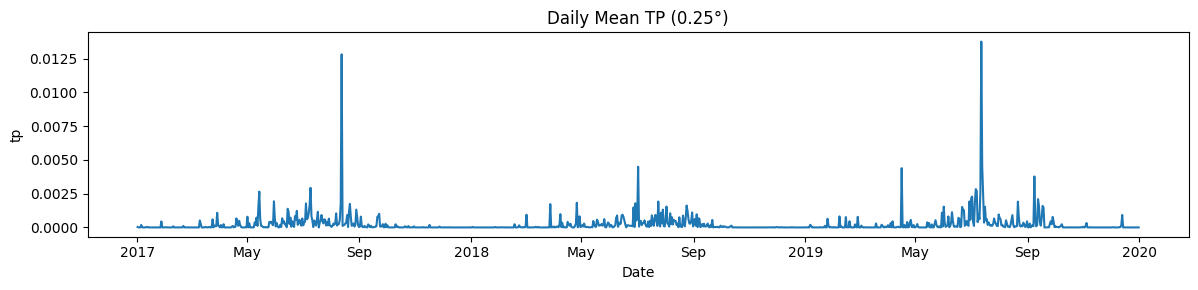

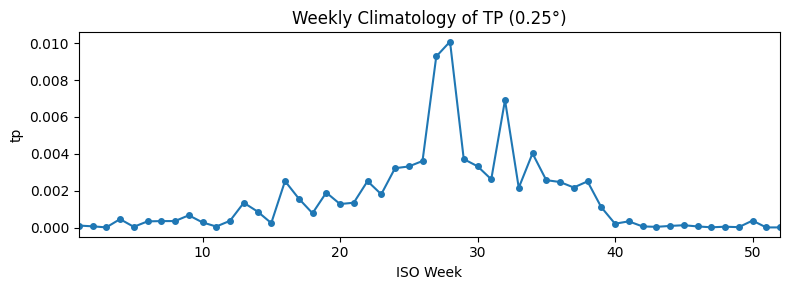

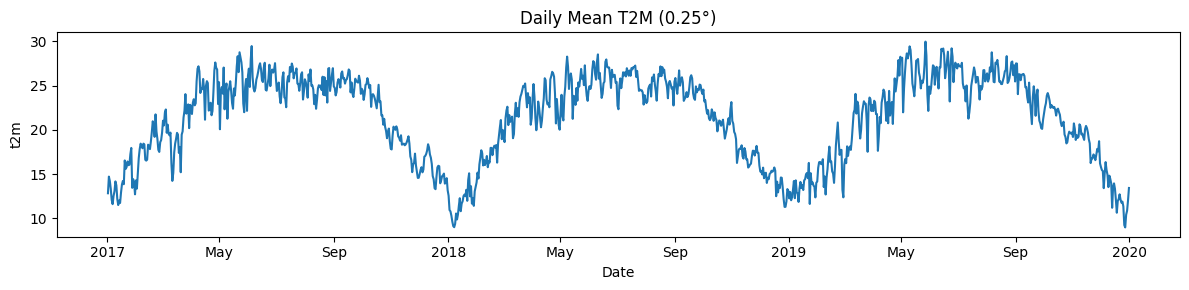

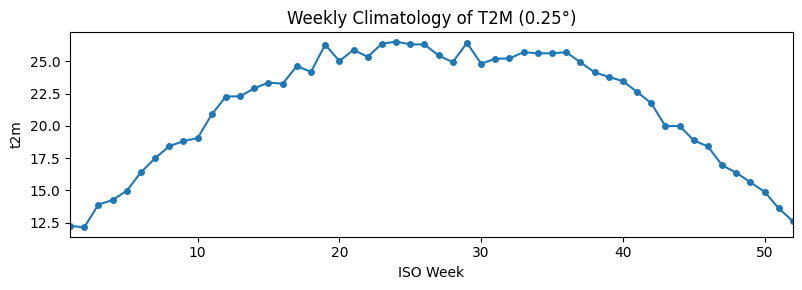

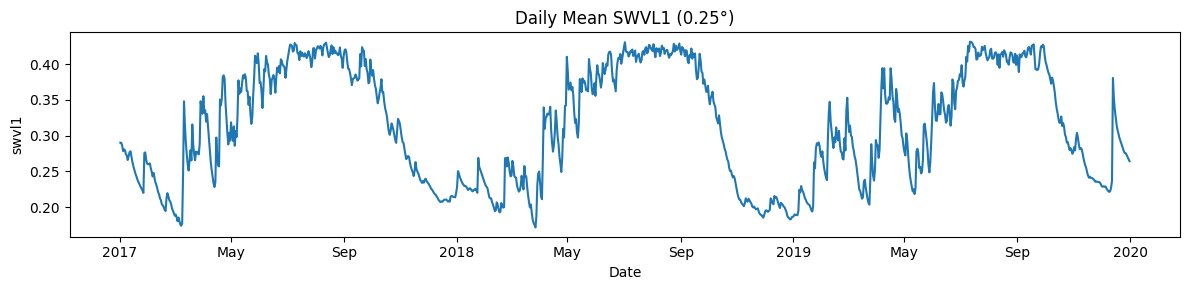

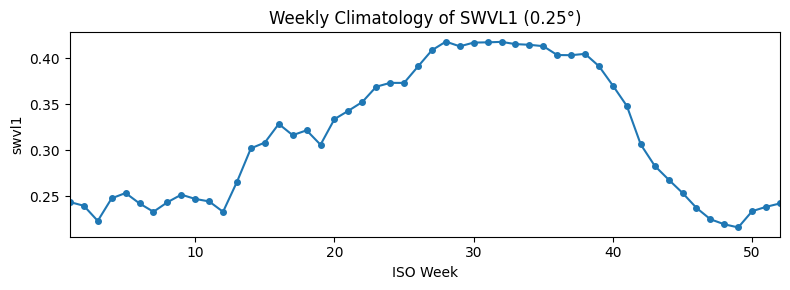

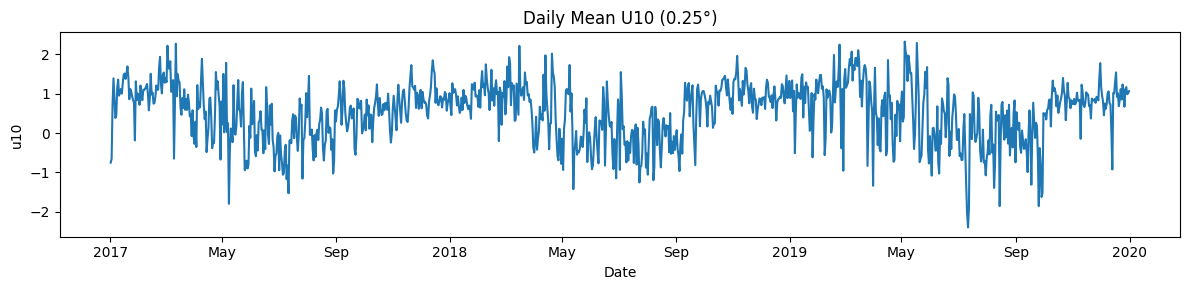

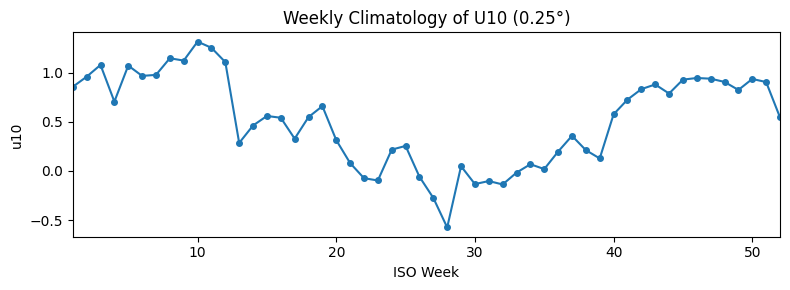

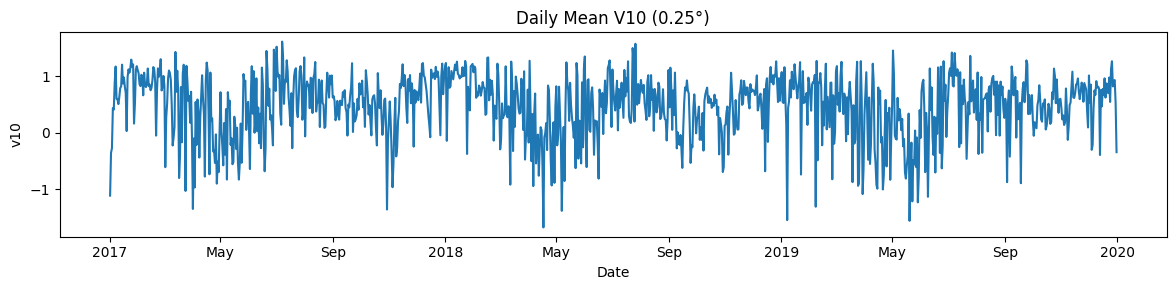

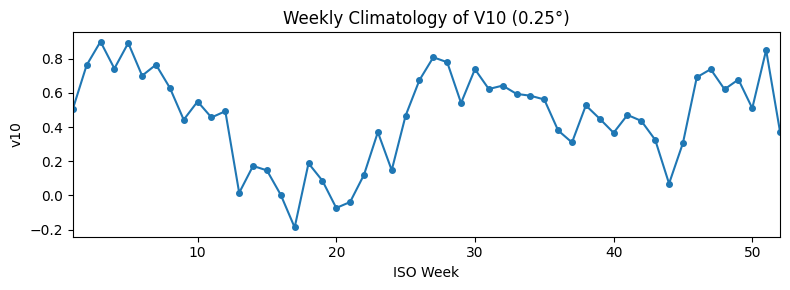

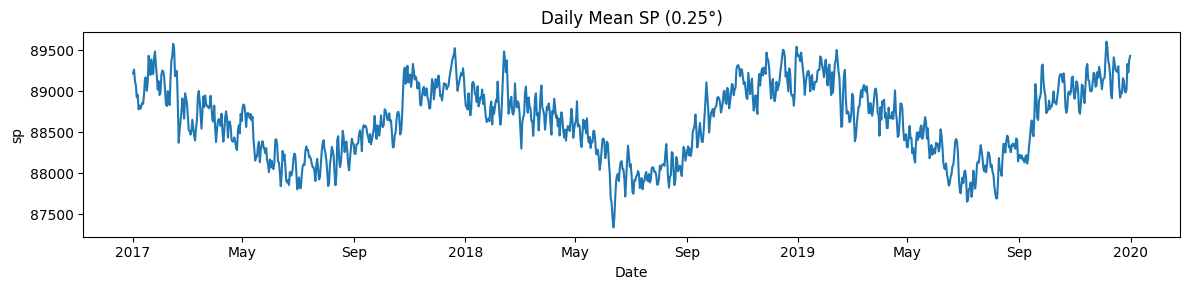

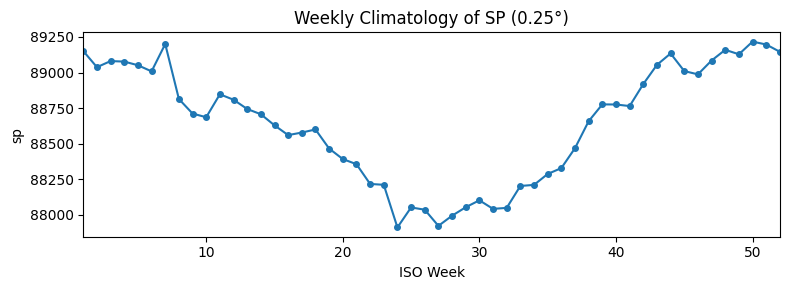

In [5]:
# 0) (Colab only) Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 1) Imports & Paths
import xarray      as xr
import pandas      as pd
import matplotlib.pyplot as plt
from pathlib       import Path

base_dir = Path('/content/drive/MyDrive/Flood_Thesis/Data/ERA5_Data/Coarse_ERA5')

# 2) Map each variable to its NetCDF file
file_map = {
    'tp':   base_dir / 'tp_ERA5_2017_2019.nc',     # total precipitation (m)
    't2m':  base_dir / 't2m_ERA5_2017_2019.nc',    # 2 m air temperature (K)
    'swvl1':base_dir / 'swvl1_ERA5_2017_2019.nc',  # soil moisture layer 1 (m³/m³)
    'u10':  base_dir / 'u10_ERA5_2017_2019.nc',    # 10 m zonal wind (m/s)
    'v10':  base_dir / 'v10_ERA5_2017_2019.nc',    # 10 m meridional wind (m/s)
    'sp':   base_dir / 'sp_ERA5_2017_2019.nc'      # surface pressure (Pa)
}

# 3) Loop over variables to plot daily & weekly climatology
for var, fpath in file_map.items():
    # 3a) Load dataset and standardize time
    ds = xr.open_dataset(fpath, engine='h5netcdf').rename({'valid_time':'time'})
    da = ds[var].mean(dim=['latitude','longitude'])
    if var == 't2m':
        # convert from Kelvin to °C
        da = da - 273.15

    # 4) Daily time-series: identify spikes
    plt.figure(figsize=(12, 3))
    da.plot.line(x='time')
    plt.title(f'Daily Mean {var.upper()} (0.25°)')
    plt.xlabel('Date')
    plt.ylabel(f'{var}')
    plt.tight_layout()
    plt.show()

    # 5) Weekly aggregation: sum for precipitation, mean for others
    if var == 'tp':
        weekly = da.resample(time='W').sum()
    else:
        weekly = da.resample(time='W').mean()

    # 6) Build DataFrame and extract ISO week
    df = weekly.to_series().reset_index(name=var)
    df['week'] = df['time'].dt.isocalendar().week

    # 7) Compute weekly climatology (mean across years for each week)
    climatology = df.groupby('week')[var].mean()

    # 8) Plot weekly climatology
    plt.figure(figsize=(8, 3))
    plt.plot(climatology.index, climatology.values, marker='o', markersize=4)
    plt.title(f'Weekly Climatology of {var.upper()} (0.25°)')
    plt.xlabel('ISO Week')
    plt.ylabel(f'{var}')
    plt.xlim(1, 52)
    plt.tight_layout()
    plt.show()

    ds.close()


In [7]:
import xarray as xr
import pandas as pd
from pathlib import Path

# 1) Configuration
base_dir = Path('/content/drive/MyDrive/Flood_Thesis/Data/ERA5_Data/Coarse_ERA5')
file_map = {
    'tp':    base_dir / 'tp_ERA5_2017_2019.nc',
    't2m':   base_dir / 't2m_ERA5_2017_2019.nc',
    'swvl1': base_dir / 'swvl1_ERA5_2017_2019.nc',
    'u10':   base_dir / 'u10_ERA5_2017_2019.nc',
    'v10':   base_dir / 'v10_ERA5_2017_2019.nc',
    'sp':    base_dir / 'sp_ERA5_2017_2019.nc'
}

# 2) Load, spatial‐mean & weekly‐aggregate
weekly_vars = {}
for var, path in file_map.items():
    ds = xr.open_dataset(path, engine='h5netcdf').rename({'valid_time':'time'})
    da = ds[var].mean(dim=['latitude','longitude'])
    if var == 't2m':
        da = da - 273.15  # K → °C
    if var == 'tp':
        wk = da.resample(time='W').sum()
    else:
        wk = da.resample(time='W').mean()
    weekly_vars[var] = wk.to_series().rename(f'weekly_{var}')
    ds.close()

# 3) Combine into one DataFrame
weekly_df = pd.concat(weekly_vars.values(), axis=1).reset_index()

# 4) Summary statistics via describe()
stats = weekly_df[['weekly_tp','weekly_t2m','weekly_swvl1',
                   'weekly_u10','weekly_v10','weekly_sp']]\
    .describe().transpose()

# 5) Reorder columns (optional)
stats = stats[['count','mean','std','min','25%','50%','75%','max']]

print("Weekly Summary Statistics (0.25°):")
print(stats)


Weekly Summary Statistics (0.25°):
              count          mean         std           min           25%  \
weekly_tp     158.0      0.001593    0.002910      0.000000      0.000037   
weekly_t2m    158.0     21.286773    4.729826     10.338632     17.184590   
weekly_swvl1  158.0      0.313794    0.077167      0.186433      0.239981   
weekly_u10    158.0      0.523796    0.556184     -1.074075      0.118630   
weekly_v10    158.0      0.459721    0.354277     -1.110753      0.282141   
weekly_sp     158.0  88652.837273  426.985262  87688.500000  88295.201172   

                       50%           75%           max  
weekly_tp         0.000506      0.001988      0.025433  
weekly_t2m       22.700496     25.244660     28.426588  
weekly_swvl1      0.304627      0.390610      0.423810  
weekly_u10        0.611242      0.953931      1.712962  
weekly_v10        0.515948      0.705096      1.093477  
weekly_sp     88688.199219  89020.246094  89405.328125  


<ipython-input-11-a836fdb4c775>:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


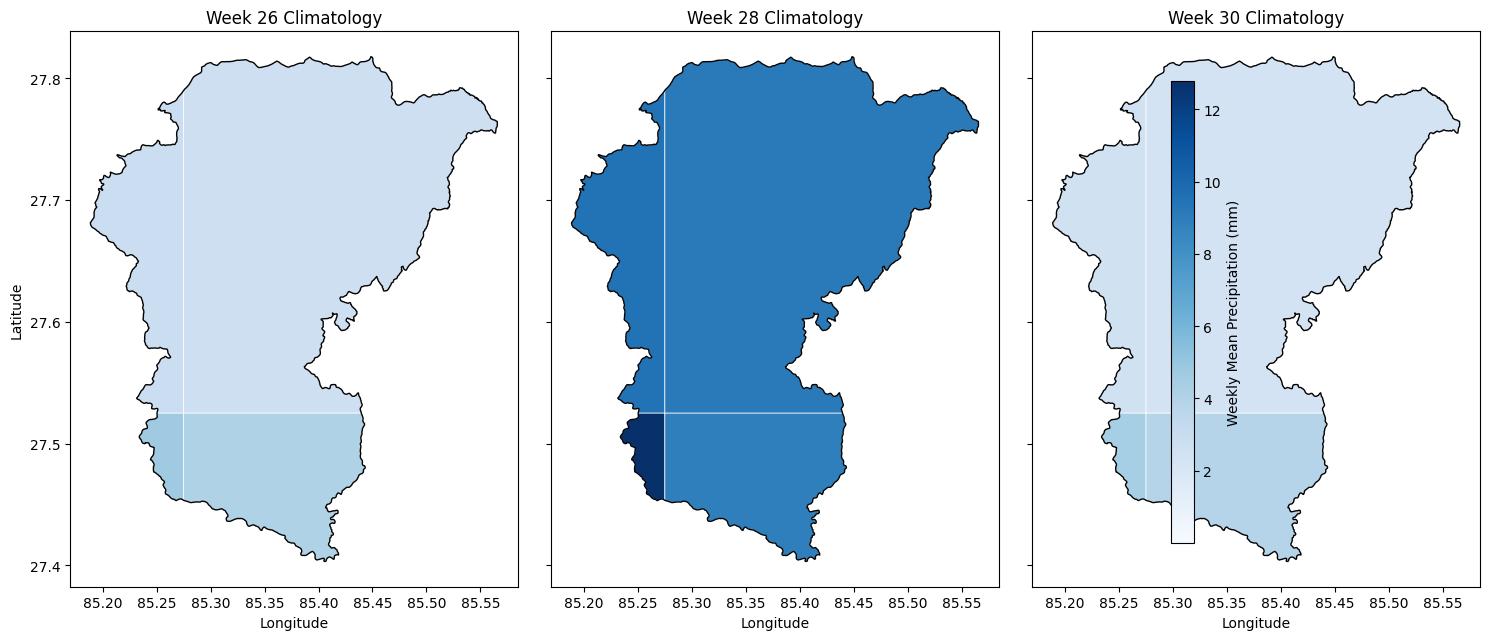

In [11]:
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box
from pathlib import Path

# 1) Paths & engine
NC_ENGINE = 'h5netcdf'
era5_dir  = Path('/content/drive/MyDrive/Flood_Thesis/Data/ERA5_Data/Coarse_ERA5')
tp_file   = era5_dir / 'tp_ERA5_2017_2019.nc'
shp_file  = Path('/content/drive/MyDrive/Flood_Thesis/Data/kathmandu valley border/kathmandu valley border.shp')

# 2) Load precipitation, convert to mm
ds    = xr.open_dataset(tp_file, engine=NC_ENGINE).rename({'valid_time':'time'})
tp_mm = ds['tp'] * 1000
ds.close()

# 3) Weekly sums and ISO week coordinate (extract .values)
weekly = tp_mm.resample(time='W').sum(dim='time')
iso_weeks = weekly['time'].dt.isocalendar().week.values
weekly = weekly.assign_coords(week=('time', iso_weeks))

# 4) Climatology by ISO week
weekly_clim = weekly.groupby('week').mean(dim='time')

# 5) Load boundary and define quadrants
valley = gpd.read_file(shp_file).to_crs(epsg=4326)
minx, miny, maxx, maxy = valley.total_bounds
lons = weekly_clim.longitude.values
lats = weekly_clim.latitude.values
mid_x, mid_y = lons.mean(), lats.mean()

quadrants = {
    'NW': box(minx, mid_y, mid_x, maxy),
    'NE': box(mid_x, mid_y, maxx, maxy),
    'SW': box(minx, miny, mid_x, mid_y),
    'SE': box(mid_x, miny, maxx, mid_y),
}

# 6) Choose weeks to plot
weeks_to_plot = [26, 28, 30]  # e.g. monsoon peak

vmin, vmax = float(weekly_clim.min()), float(weekly_clim.max())

fig, axes = plt.subplots(1, len(weeks_to_plot), figsize=(5*len(weeks_to_plot), 6), sharey=True)
for ax, wk in zip(axes, weeks_to_plot):
    arr = weekly_clim.sel(week=wk)
    rows = []
    for quad, poly in quadrants.items():
        lon = lons[0] if quad in ('NW','SW') else lons[1]
        lat = lats[1] if quad in ('NW','NE') else lats[0]
        val = float(arr.sel(latitude=lat, longitude=lon).values)
        rows.append({'precip_mm': val, 'geometry': poly})
    gdf_q = gpd.GeoDataFrame(rows, crs='EPSG:4326')
    clipped = gpd.overlay(gdf_q, valley, how='intersection')

    clipped.plot(
        ax=ax,
        column='precip_mm',
        cmap='Blues',
        vmin=vmin,
        vmax=vmax,
        edgecolor='white',
        linewidth=0.5,
        legend=False
    )
    valley.boundary.plot(ax=ax, edgecolor='black', linewidth=1)
    ax.set_title(f"Week {wk} Climatology")
    ax.set_xlabel("Longitude")
axes[0].set_ylabel("Latitude")

# Shared colorbar
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
fig.colorbar(sm, ax=axes.tolist(), label="Weekly Mean Precipitation (mm)")

plt.tight_layout()
plt.show()


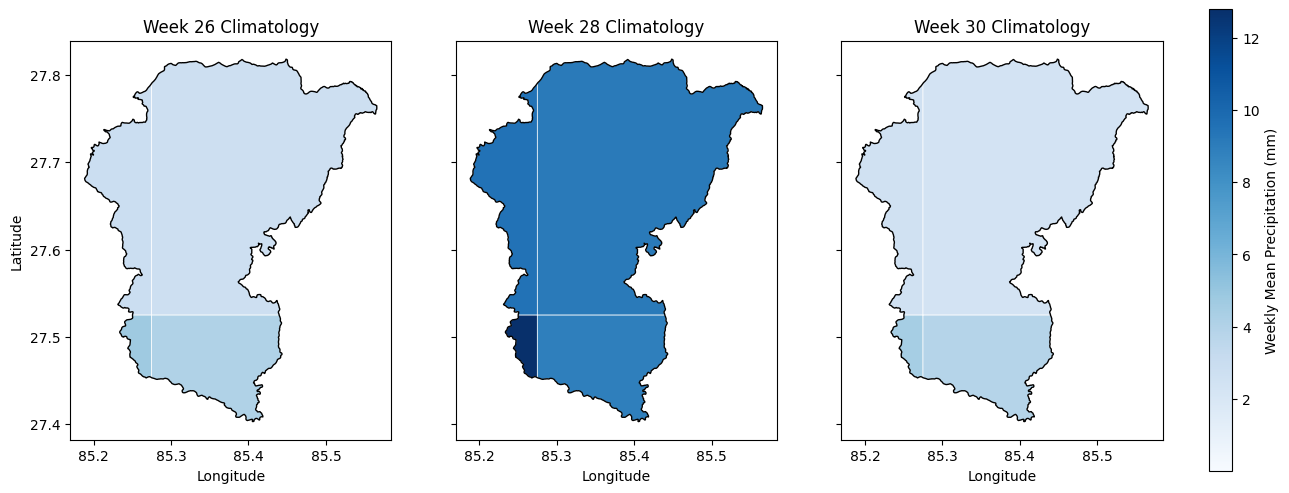

In [13]:
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box
from pathlib import Path

# 1) Paths & engine
NC_ENGINE = 'h5netcdf'
era5_dir  = Path('/content/drive/MyDrive/Flood_Thesis/Data/ERA5_Data/Coarse_ERA5')
tp_file   = era5_dir / 'tp_ERA5_2017_2019.nc'
shp_file  = Path('/content/drive/MyDrive/Flood_Thesis/Data/kathmandu valley border/kathmandu valley border.shp')

# 2) Load & convert to mm
ds    = xr.open_dataset(tp_file, engine=NC_ENGINE).rename({'valid_time':'time'})
tp_mm = ds['tp'] * 1000
ds.close()

# 3) Weekly sums & ISO‐week coord
weekly = tp_mm.resample(time='W').sum(dim='time')
iso_weeks = weekly.time.dt.isocalendar().week.values
weekly = weekly.assign_coords(week=('time', iso_weeks))

# 4) Climatology by ISO week
weekly_clim = weekly.groupby('week').mean(dim='time')

# 5) Load boundary, compute quadrants
valley = gpd.read_file(shp_file).to_crs(epsg=4326)
minx, miny, maxx, maxy = valley.total_bounds
lons = weekly_clim.longitude.values
lats = weekly_clim.latitude.values
mid_x, mid_y = lons.mean(), lats.mean()
quadrants = {
    'NW': box(minx, mid_y, mid_x, maxy),
    'NE': box(mid_x, mid_y, maxx, maxy),
    'SW': box(minx, miny, mid_x, mid_y),
    'SE': box(mid_x, miny, maxx, mid_y),
}

# 6) Weeks to plot
weeks_to_plot = [26, 28, 30]  # just examples; pick any 1–52

# 7) Prepare figure
fig, axes = plt.subplots(1, len(weeks_to_plot), figsize=(5*len(weeks_to_plot), 6), sharey=True)
vmin = float(weekly_clim.min())
vmax = float(weekly_clim.max())

for ax, wk in zip(axes, weeks_to_plot):
    arr = weekly_clim.sel(week=wk)
    rows = []
    for quad, poly in quadrants.items():
        lon = lons[0] if quad in ('NW','SW') else lons[1]
        lat = lats[1] if quad in ('NW','NE') else lats[0]
        val = float(arr.sel(latitude=lat, longitude=lon).values)
        rows.append({'precip_mm': val, 'geometry': poly})
    gdf_q = gpd.GeoDataFrame(rows, crs='EPSG:4326')
    clipped = gpd.overlay(gdf_q, valley, how='intersection')

    im = clipped.plot(
        ax=ax,
        column='precip_mm',
        cmap='Blues',
        vmin=vmin,
        vmax=vmax,
        edgecolor='white',
        linewidth=0.5,
        legend=False
    )
    valley.boundary.plot(ax=ax, edgecolor='black', linewidth=1)
    ax.set_title(f"Week {wk} Climatology")
    ax.set_xlabel("Longitude")

axes[0].set_ylabel("Latitude")

# 8) Shared colorbar on right
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label("Weekly Mean Precipitation (mm)")

plt.show()


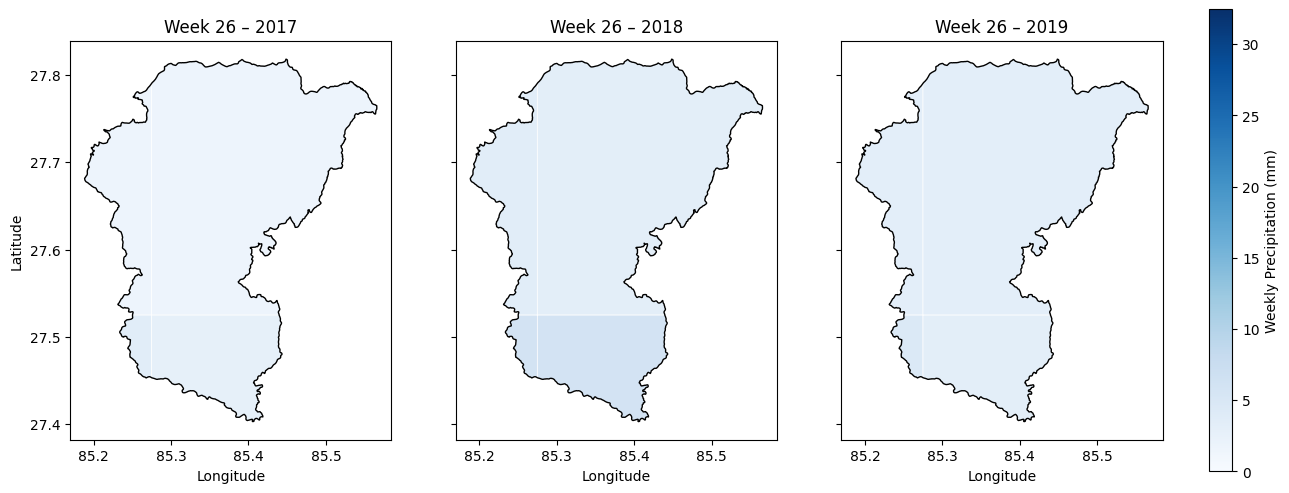

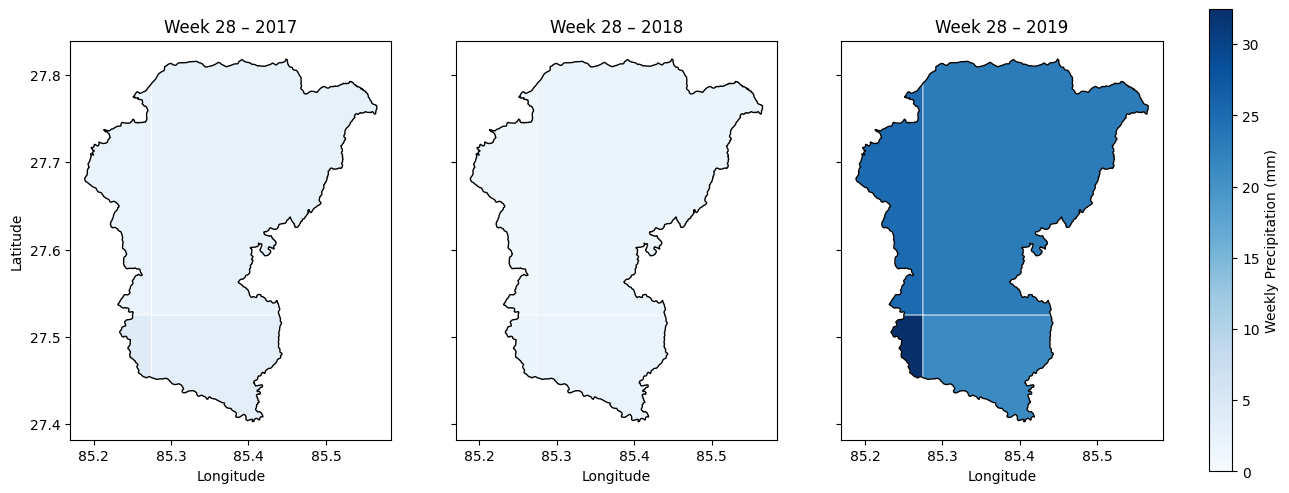

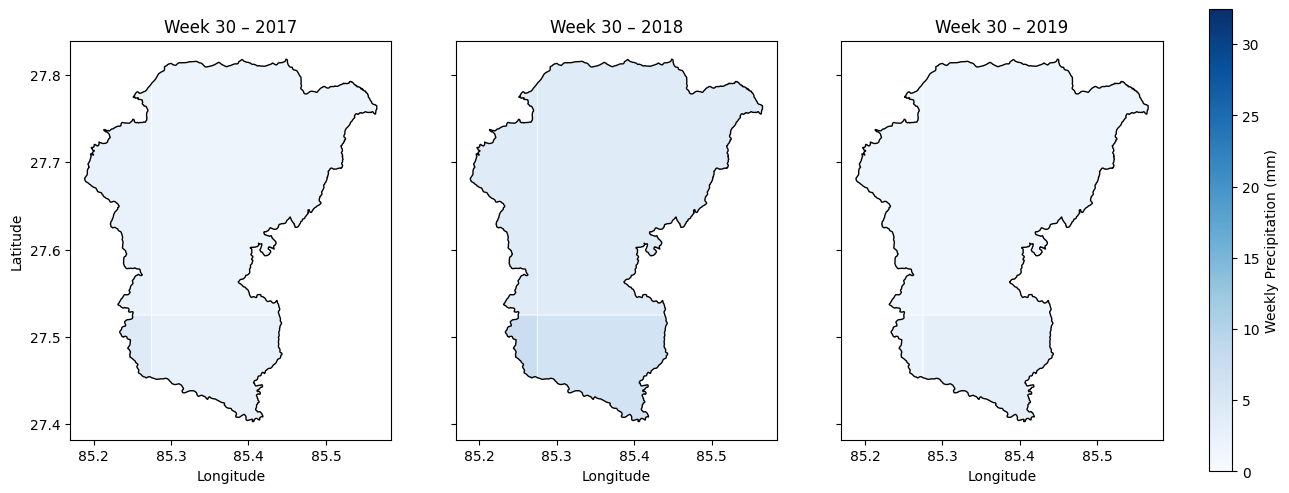

In [15]:
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box
from pathlib import Path

# 1) Configuration
NC_ENGINE  = 'h5netcdf'
era5_dir   = Path('/content/drive/MyDrive/Flood_Thesis/Data/ERA5_Data/Coarse_ERA5')
tp_file    = era5_dir / 'tp_ERA5_2017_2019.nc'
shp_file   = Path('/content/drive/MyDrive/Flood_Thesis/Data/kathmandu valley border/kathmandu valley border.shp')

# Weeks you want to inspect
weeks_to_plot = [26, 28, 30]   # e.g. Monsoon peak weeks
years        = [2017, 2018, 2019]

# 2) Load precipitation and convert m → mm
ds    = xr.open_dataset(tp_file, engine=NC_ENGINE).rename({'valid_time':'time'})
tp_mm = ds['tp'] * 1000
ds.close()

# 3) Resample to weekly sums + assign ISO week & year coords
weekly = tp_mm.resample(time='W').sum(dim='time')
iso_weeks = weekly.time.dt.isocalendar().week.values
iso_years = weekly.time.dt.year.values
weekly   = weekly.assign_coords(week=('time', iso_weeks),
                                year=('time', iso_years))

# 4) Load boundary & define quadrants
valley = gpd.read_file(shp_file).to_crs(epsg=4326)
minx, miny, maxx, maxy = valley.total_bounds
lons = weekly.longitude.values
lats = weekly.latitude.values
mid_x, mid_y = lons.mean(), lats.mean()
quadrants = {
    'NW': box(minx, mid_y, mid_x, maxy),
    'NE': box(mid_x, mid_y, maxx, maxy),
    'SW': box(minx, miny, mid_x, mid_y),
    'SE': box(mid_x, miny, maxx, mid_y),
}

# 5) Loop over weeks
for wk in weeks_to_plot:
    fig, axes = plt.subplots(1, len(years), figsize=(5*len(years), 6), sharey=True)
    vmin = float(weekly.min())
    vmax = float(weekly.max())

    for ax, yr in zip(axes, years):
        # select the single week-year slice
        sel = weekly.sel(time=((weekly.week==wk)&(weekly.year==yr)))
        if sel.time.size == 0:
            ax.set_title(f"Week {wk} – {yr}\n(no data)")
            continue
        da = sel.squeeze(dim='time')

        # build quadrant GeoDataFrame
        rows = []
        for quad, poly in quadrants.items():
            lon = lons[0] if quad in ('NW','SW') else lons[1]
            lat = lats[1] if quad in ('NW','NE') else lats[0]
            val = float(da.sel(latitude=lat, longitude=lon).values)
            rows.append({'value': val, 'geometry': poly})
        gdf_q = gpd.GeoDataFrame(rows, crs='EPSG:4326')
        clipped = gpd.overlay(gdf_q, valley, how='intersection')

        # plot
        im = clipped.plot(
            ax=ax,
            column='value',
            cmap='Blues',
            vmin=vmin, vmax=vmax,
            edgecolor='white', linewidth=0.5,
            legend=False
        )
        valley.boundary.plot(ax=ax, edgecolor='black', linewidth=1)
        ax.set_title(f"Week {wk} – {yr}")
        ax.set_xlabel("Longitude")

    axes[0].set_ylabel("Latitude")

    # shared colorbar
    sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin,vmax=vmax))
    sm._A = []
    cbar = fig.colorbar(sm, ax=axes.tolist(), orientation='vertical', fraction=0.02, pad=0.04)
    cbar.set_label("Weekly Precipitation (mm)")


    plt.show()


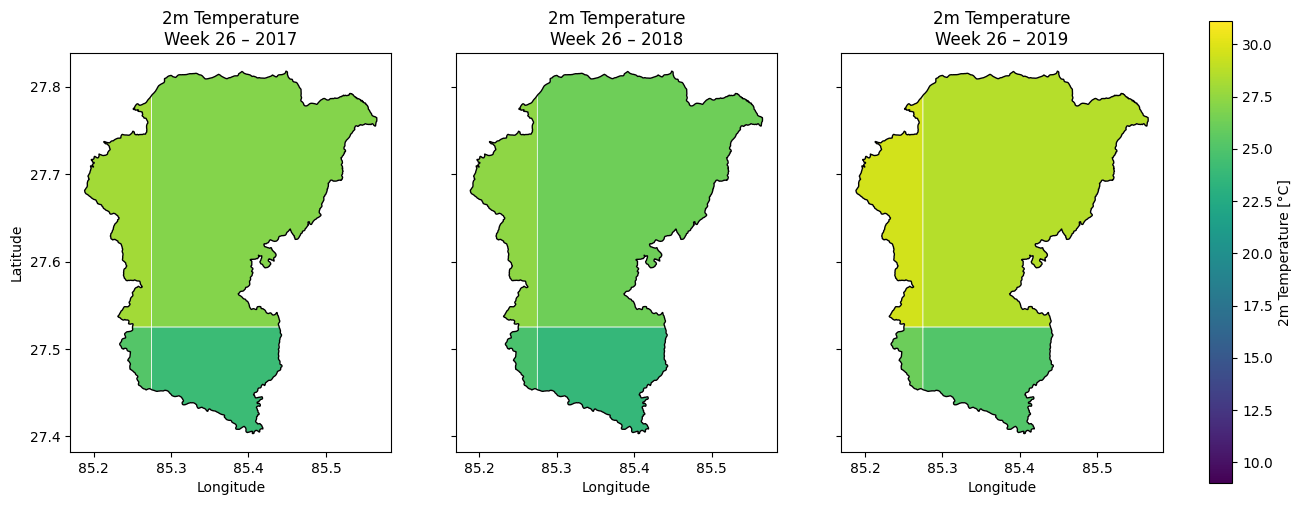

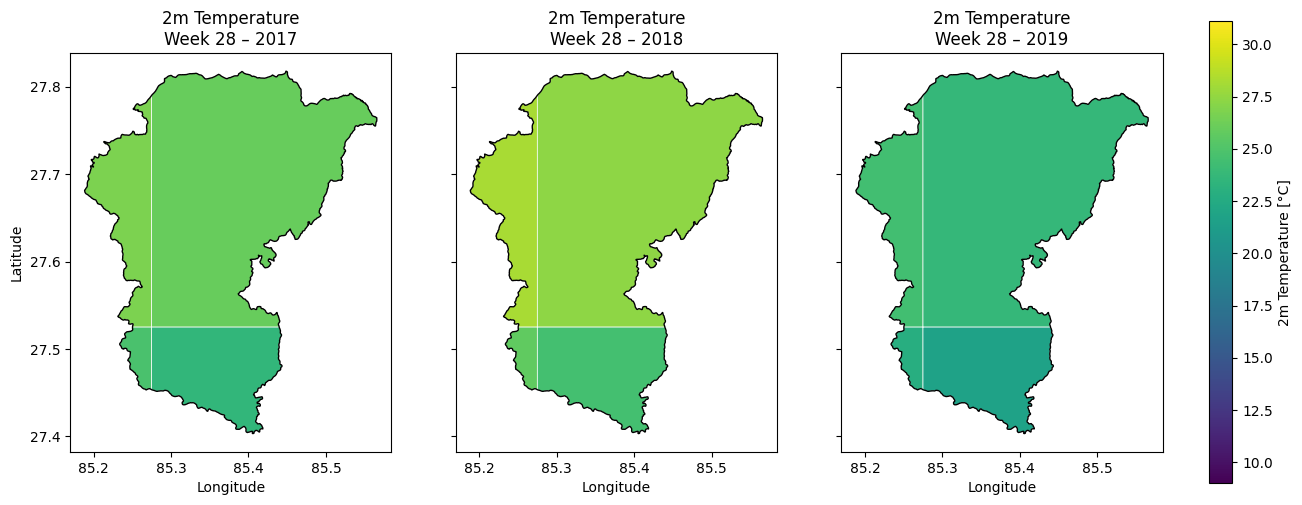

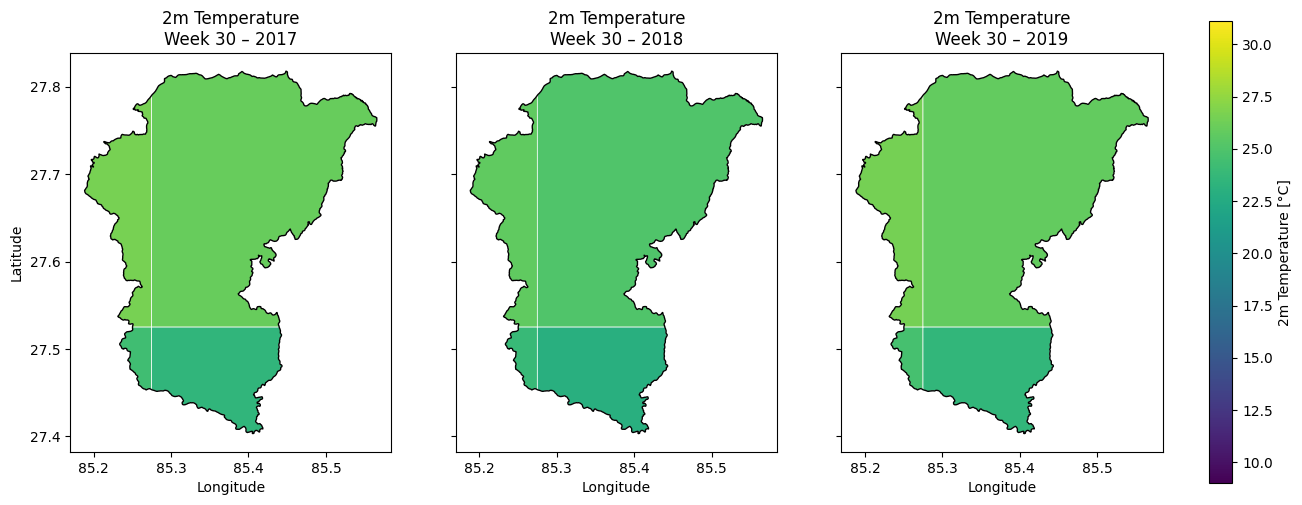

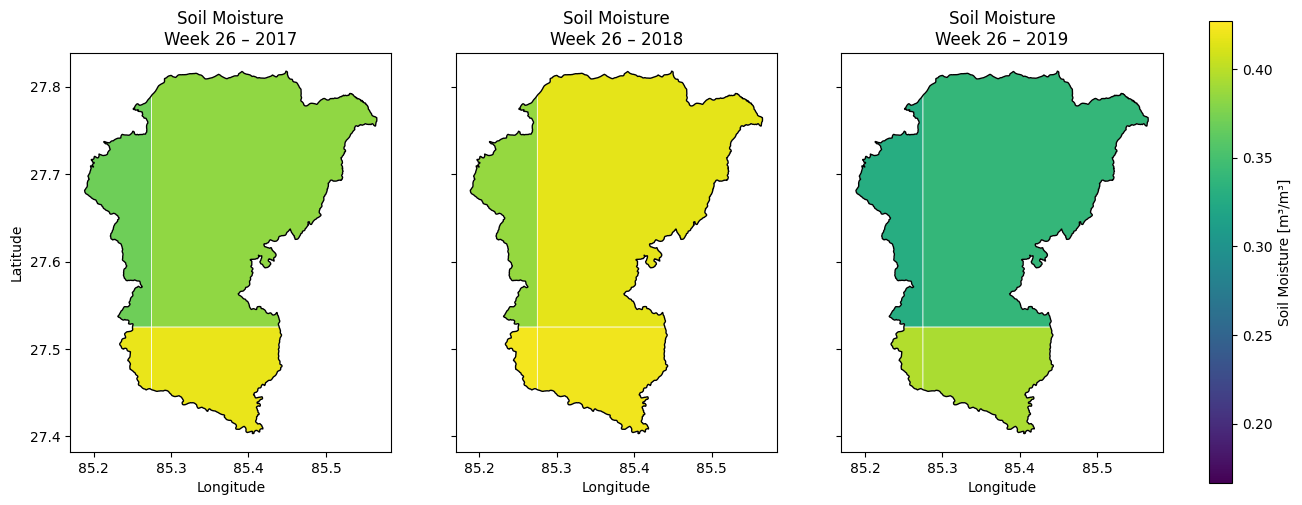

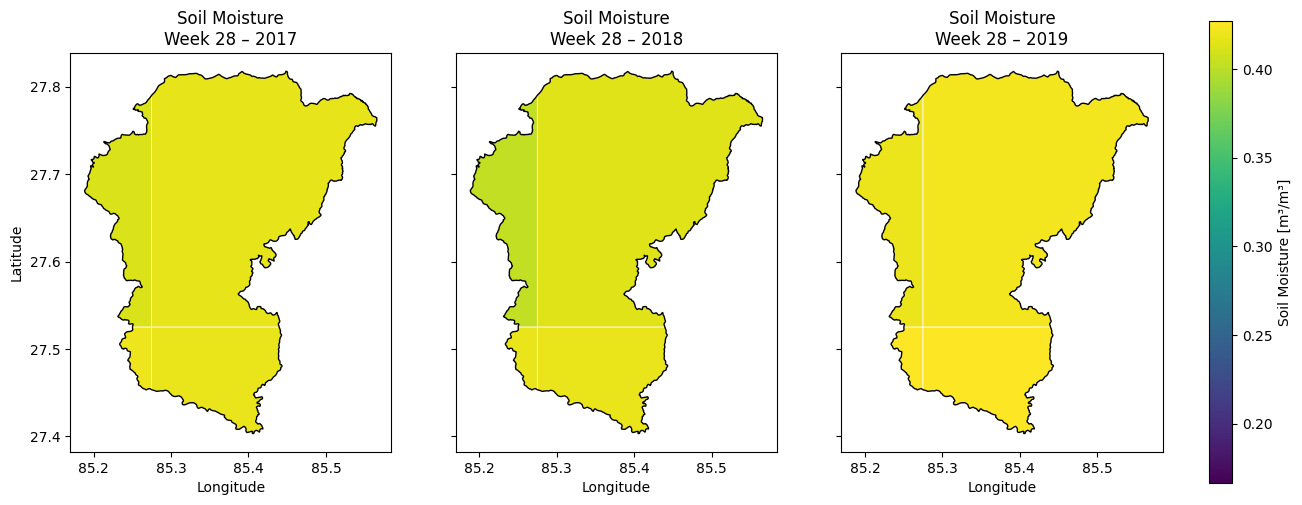

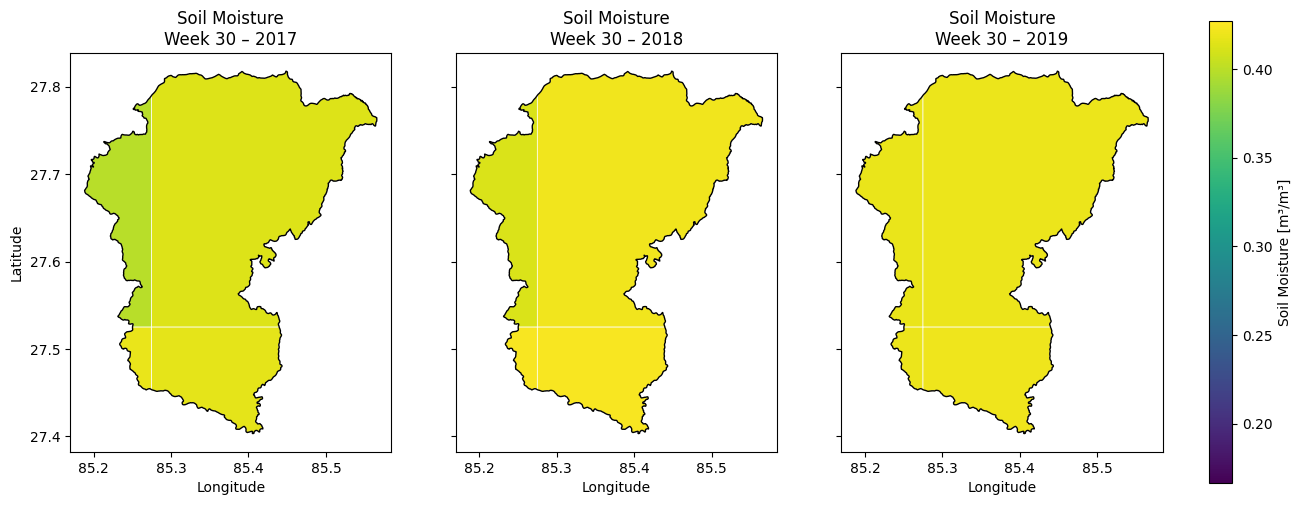

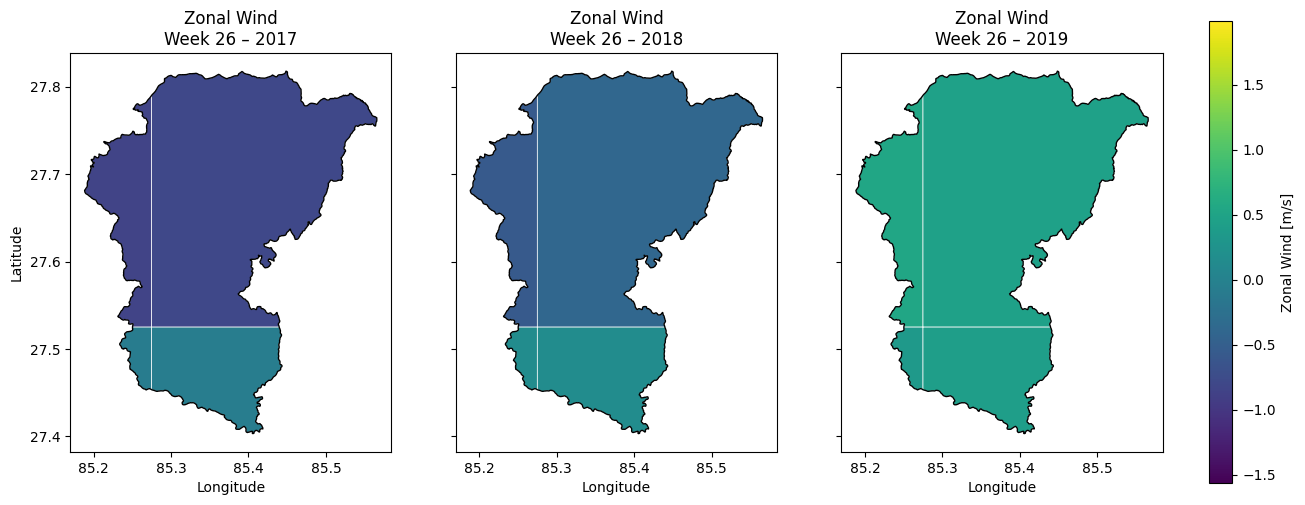

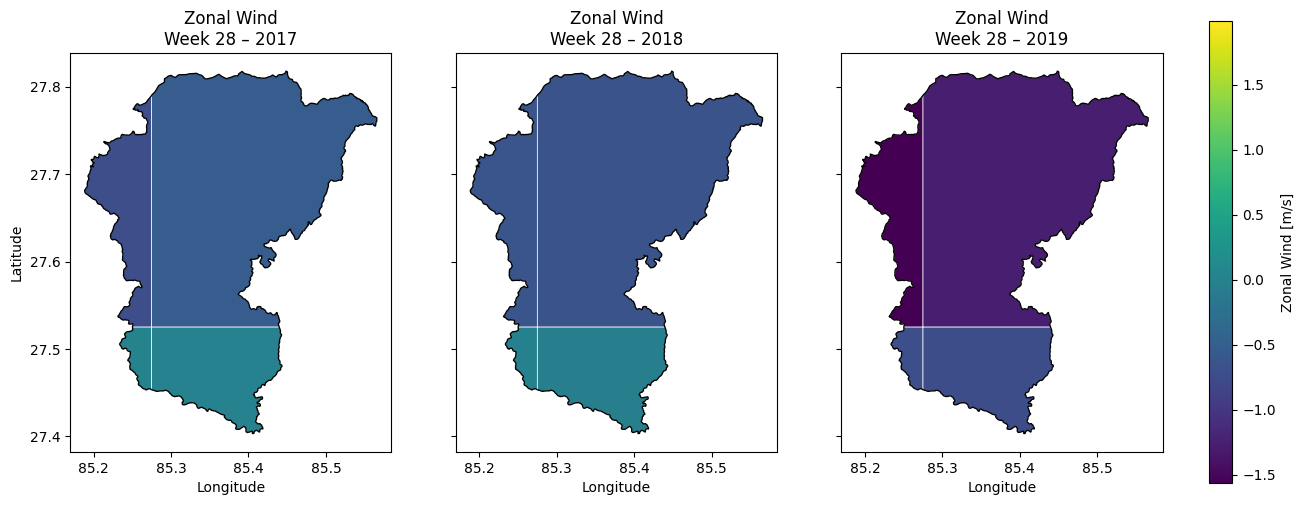

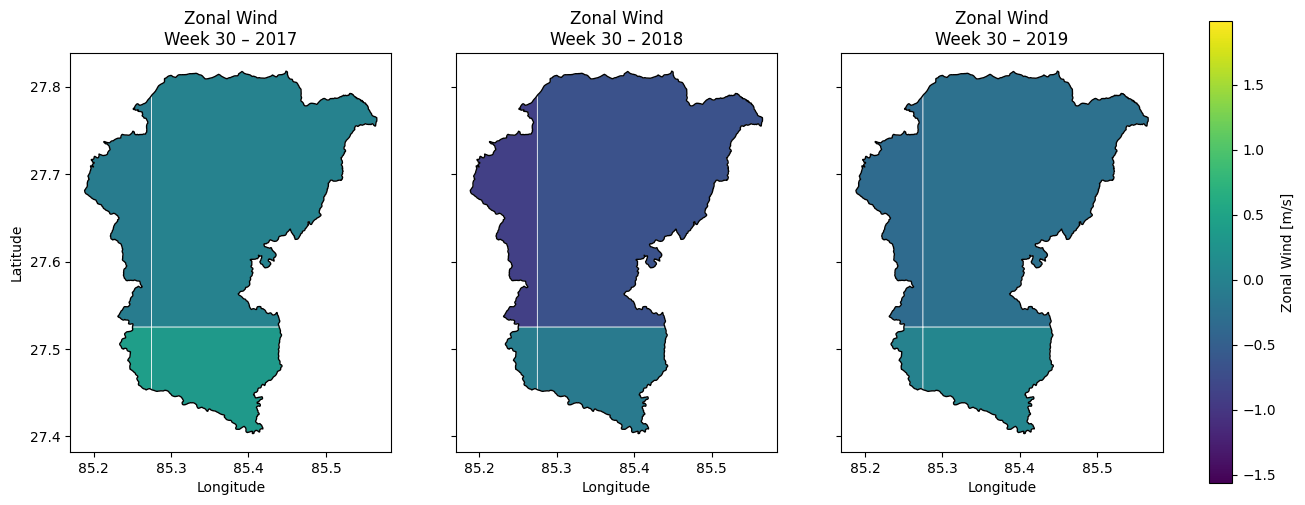

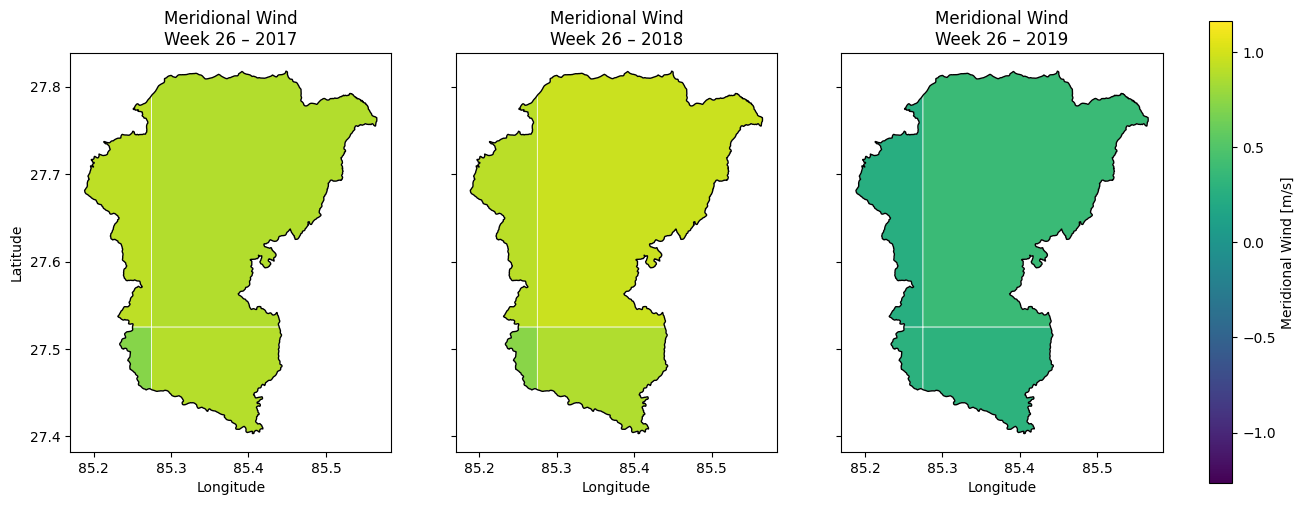

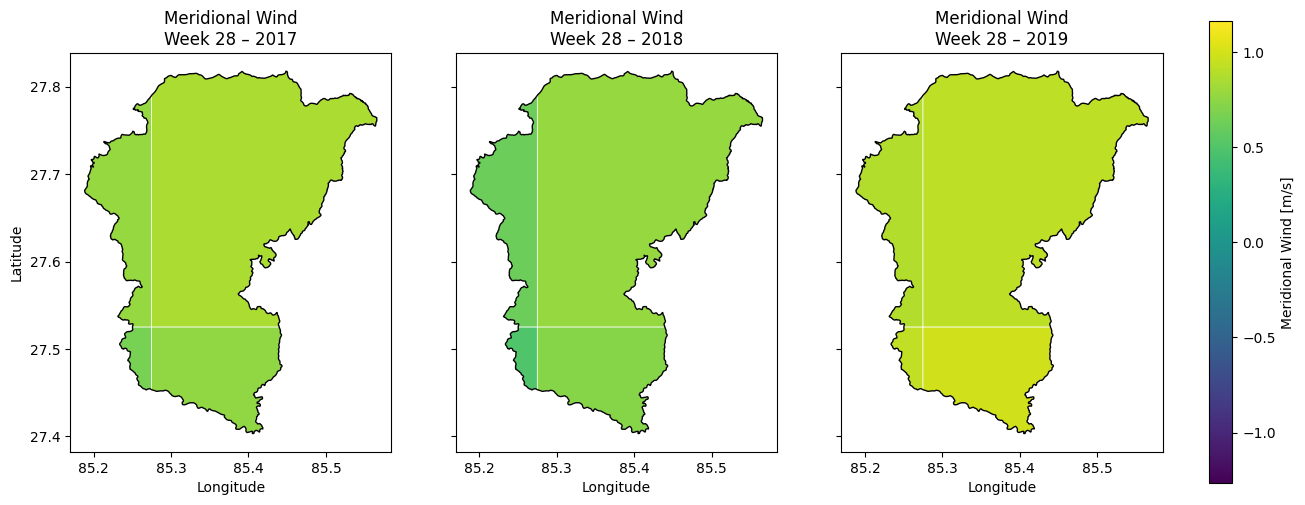

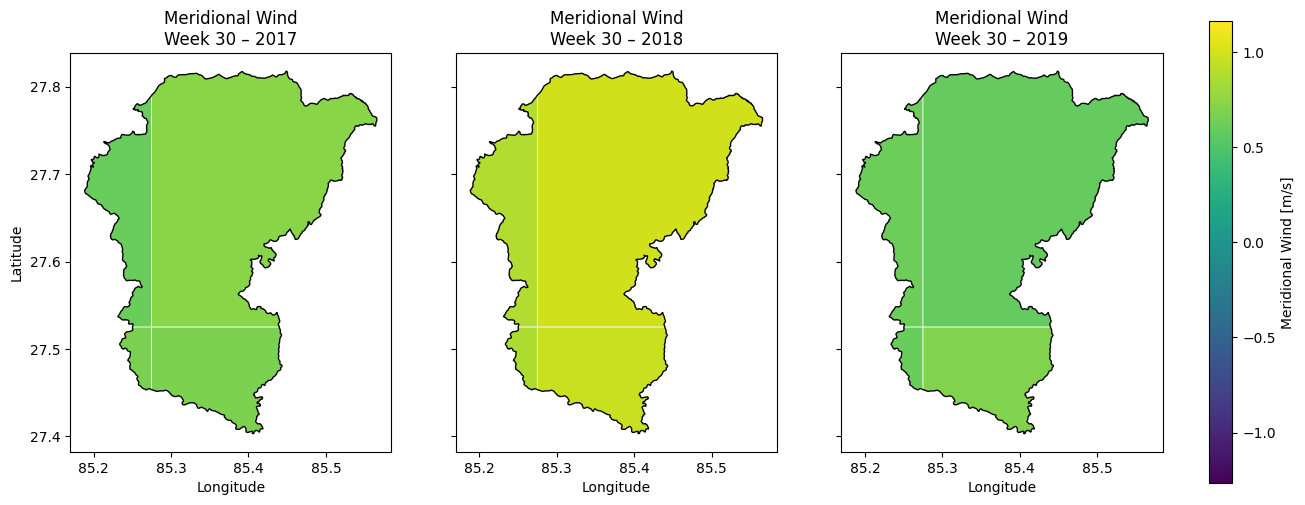

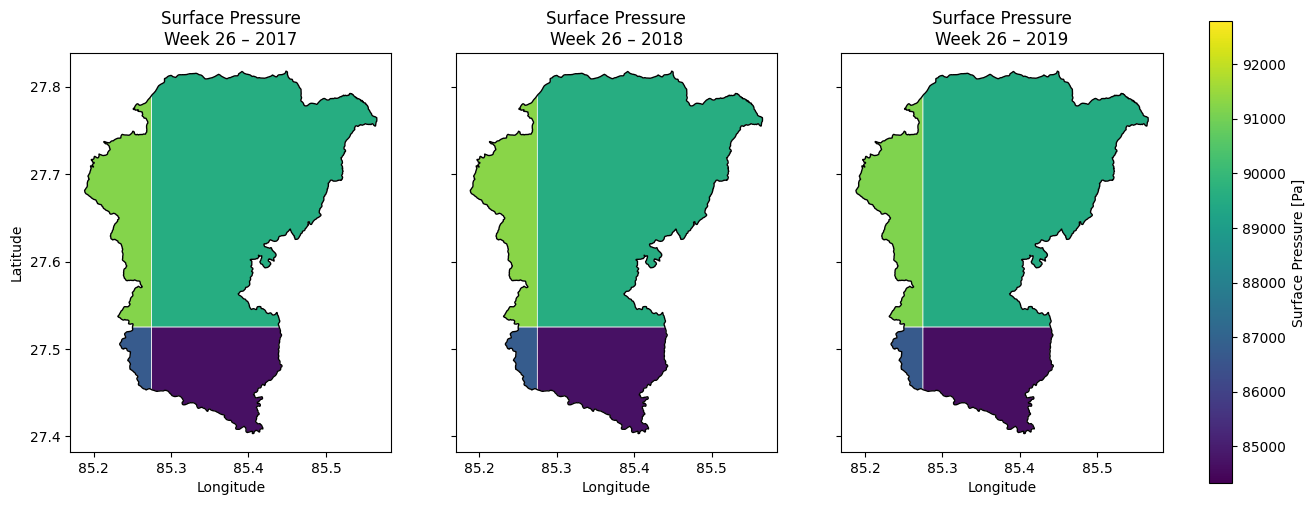

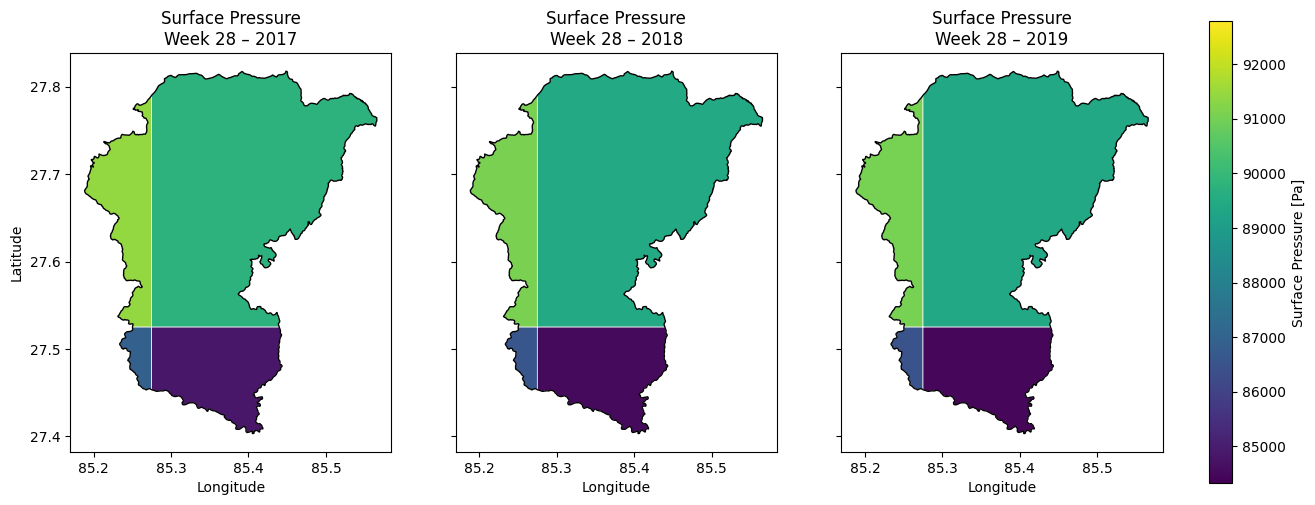

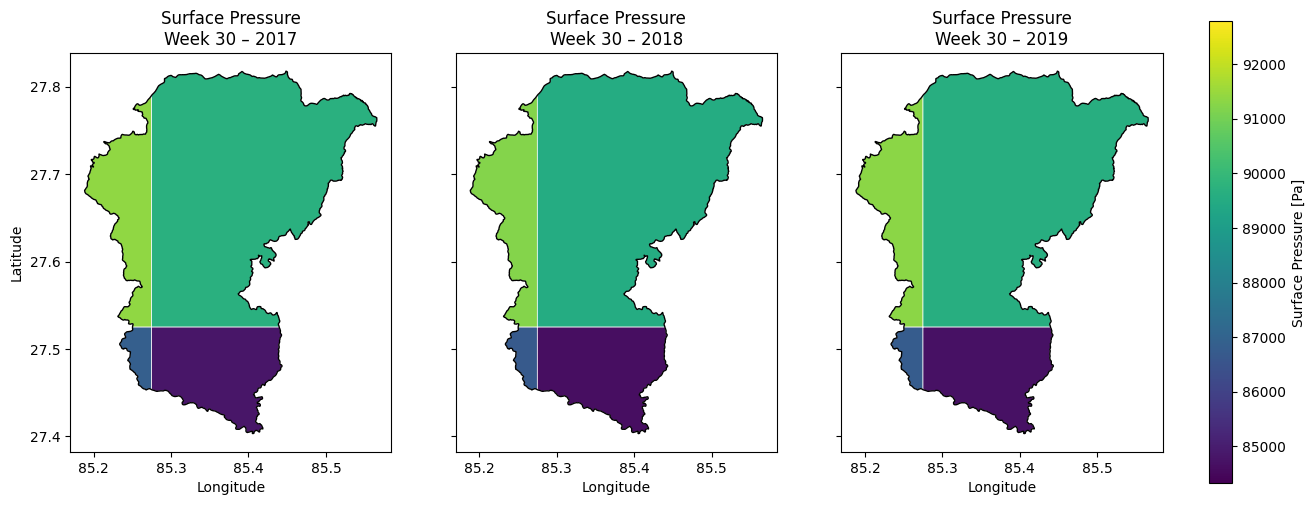

In [21]:
import glob
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box
from pathlib import Path
import numpy as np

# ─── 1) Configuration ────────────────────────────────────────────────
NC_ENGINE  = 'h5netcdf'
data_dir   = Path('/content/drive/MyDrive/Flood_Thesis/Data')
coarse_dir = data_dir / 'ERA5_Data' / 'Coarse_ERA5'

# ─── 2) Auto‐find the shapefile ─────────────────────────────────────
shp_list = glob.glob(str(data_dir / 'kathmandu valley border' / '*.shp'))
if not shp_list:
    raise FileNotFoundError("No .shp found in kathmandu valley border folder")
shapefile = shp_list[0]
valley    = gpd.read_file(shapefile).to_crs(epsg=4326)
minx, miny, maxx, maxy = valley.total_bounds

# ─── 3) Grid centers from a sample file ─────────────────────────────
ds0  = xr.open_dataset(coarse_dir / 't2m_ERA5_2017_2019.nc',
                      engine=NC_ENGINE).rename({'valid_time':'time'})
lons = ds0.longitude.values
lats = ds0.latitude.values
ds0.close()

# quadrants
mid_x, mid_y = lons.mean(), lats.mean()
quadrants = {
    'NW': box(minx, mid_y, mid_x, maxy),
    'NE': box(mid_x, mid_y, maxx, maxy),
    'SW': box(minx, miny, mid_x, mid_y),
    'SE': box(mid_x, miny, maxx, mid_y),
}

# ─── 4) Weeks & years to plot ────────────────────────────────────────
weeks_to_plot = [26, 28, 30]          # pick your ISO weeks
years_to_plot = [2017, 2018, 2019]    # the three years

# ─── 5) Variable definitions ───────────────────────────────────────
# filename, label, unit, conversion (if any)
var_map = {
    't2m':   ('t2m_ERA5_2017_2019.nc',    '2m Temperature',  '°C',    lambda da: da - 273.15),
    'swvl1': ('swvl1_ERA5_2017_2019.nc',  'Soil Moisture',    'm³/m³', lambda da: da),
    'u10':   ('u10_ERA5_2017_2019.nc',    'Zonal Wind',       'm/s',   lambda da: da),
    'v10':   ('v10_ERA5_2017_2019.nc',    'Meridional Wind',  'm/s',   lambda da: da),
    'sp':    ('sp_ERA5_2017_2019.nc',     'Surface Pressure', 'Pa',    lambda da: da),
}

# ─── 6) Loop through variables ──────────────────────────────────────
for var, (fname, label, unit, convert) in var_map.items():
    # a) Load full DataArray and convert units
    ds = xr.open_dataset(coarse_dir / fname, engine=NC_ENGINE).rename({'valid_time':'time'})
    da = convert(ds[var])   # dims = (time, latitude, longitude)
    ds.close()

    # b) Weekly mean (preserves spatial dims)
    weekly = da.resample(time='W').mean(dim='time')
    iso_weeks = weekly.time.dt.isocalendar().week.values
    iso_years = weekly.time.dt.year.values
    weekly = weekly.assign_coords(week=('time', iso_weeks),
                                  year=('time', iso_years))

    # c) Color scale limits (global for this variable)
    vmin, vmax = float(weekly.min()), float(weekly.max())

    # d) For each ISO week & year, map the quadrants
    for wk in weeks_to_plot:
        fig, axes = plt.subplots(1, len(years_to_plot), figsize=(5*len(years_to_plot), 6), sharey=True)
        for ax, yr in zip(axes, years_to_plot):
            mask = (weekly.week == wk) & (weekly.year == yr)
            if not mask.any().item():
                ax.set_title(f"{label}\nWeek {wk} – {yr}\nNo data")
                continue
            # mean over that week-year slice (though it's already weekly mean, so this picks it)
            arr = weekly.sel(time=weekly.time[mask.values]).mean(dim='time')

            # build quadrant features
            rows = []
            for quad, poly in quadrants.items():
                lon = lons[0] if quad in ('NW','SW') else lons[1]
                lat = lats[1] if quad in ('NW','NE') else lats[0]
                val = float(arr.sel(latitude=lat, longitude=lon).values)
                rows.append({'value': val, 'geometry': poly})

            gdf_q = gpd.GeoDataFrame(rows, crs='EPSG:4326')
            clipped = gpd.overlay(gdf_q, valley, how='intersection')

            clipped.plot(
                ax=ax, column='value',
                cmap='viridis', vmin=vmin, vmax=vmax,
                edgecolor='white', linewidth=0.5,
                legend=False
            )
            valley.boundary.plot(ax=ax, edgecolor='black', linewidth=1)
            ax.set_title(f"{label}\nWeek {wk} – {yr}")
            ax.set_xlabel("Longitude")

        axes[0].set_ylabel("Latitude")
        sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=vmin, vmax=vmax))
        sm._A = []
        cbar = fig.colorbar(sm, ax=axes.tolist(), orientation='vertical', fraction=0.02, pad=0.04)
        cbar.set_label(f"{label} [{unit}]")

        plt.show()
